<a href="https://colab.research.google.com/github/justadudewhohacks/ipynbs/blob/master/face_detection_fpn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [0]:
!pip install -U -q PyDrive
!pip install git+https://github.com/justadudewhohacks/image_augment.py
!pip install git+https://github.com/justadudewhohacks/colabsnippets

     |████████████████████████████████| 993kB 9.7MB/s 
  Cloning https://github.com/justadudewhohacks/image_augment.py to /tmp/pip-req-build-1buu5hd7
  Running command git clone -q https://github.com/justadudewhohacks/image_augment.py /tmp/pip-req-build-1buu5hd7
  Created wheel for augment: filename=augment-0.0.5-cp36-none-any.whl size=4882 sha256=c90e553d363a9d6972d6da6bc0f3333836f994a7d8284d64314ba434bdf5130b
  Stored in directory: /tmp/pip-ephem-wheel-cache-x1k0yzy3/wheels/6f/f7/4a/e8e6dc3a68ae11e9b1f6872c5c1be9bed2052f05e487df549f
Successfully built augment
  Cloning https://github.com/justadudewhohacks/colabsnippets to /tmp/pip-req-build-1sphwo3p
  Running command git clone -q https://github.com/justadudewhohacks/colabsnippets /tmp/pip-req-build-1sphwo3p
  Created wheel for colabsnippets: filename=colabsnippets-0.0.26-cp36-none-any.whl size=17211 sha256=9a67ddc4984cbc74a61dda659c351e17bb0718fb0a60ed100133115282601808
  Stored in directory: /tmp/pip-ephem-wheel-cache-6sr8clxw/wheel

# Download Data

In [0]:
from colabsnippets.DataDownloader import DataDownloader

data_downloader = DataDownloader(data_dir = './data')

wider_shards = [
  { "images": "1JHmXqGPngDCbM56eYPeqsaCgJC4vgL4m", "boxes": "1Hd2i-6dnaWIriFK4Hj0CLZnfGtKcKj9L" }
]

fddb_shards = [
  { "images": "1C8RpAZYg5nsPCAOLESGFwKxEaHx5V3Ag", "boxes": "1ACZPuSB7j0c0_hDIBL_MSW4rrzPhC1ab" }
]

data_downloader.download_data({ "WIDER" : wider_shards }, ['boxes'])
data_downloader.download_data({ "FDDB" : fddb_shards }, ['boxes'])
!mkdir ./data/celeba
data_downloader.drive.CreateFile({ 'id': '1rujtZzpWX5DP7E7HaxgqOPpk0cRb0ajD' }).GetContentFile('./data/celeba/landmarks.json')
data_downloader.drive.CreateFile({ 'id': '1Ld4C3Hsq3Ecq-0g8PjFY3R_O9mgq-i9Y' }).GetContentFile('./wider_trainData.json')

print('done!')

W0811 10:18:58.277847 139897585391488 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1288: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0811 10:19:52.270733 139897585391488 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
 

downloading data for db: WIDER
downloading data for shard 0
unzipping images.7z done in 141.51880884170532s
unzipping boxes.7z done in 65.53613924980164s
download_data - total time: 225.40112566947937s
downloading data for db: FDDB
downloading data for shard 0
unzipping images.7z done in 5.600881814956665s
unzipping boxes.7z done in 1.7853026390075684s
download_data - total time: 9.515048265457153s
done!


In [0]:
from colabsnippets.DataDownloader import DataDownloader
data_downloader = DataDownloader(data_dir = './data')

celeba_shards = [
  { "images": "1I6Mq2RyDUcxSDCWIljx6XYSuE4lDMiMZ" },
  { "images": "1lzFAjTok3icel-ChwJ99lfkllKzMyNOU" },
  { "images": "19ovg-y6Mf1T122I4zfS961HqrxCwvWrA" },
  { "images": "1yz_xyxoZhJtNy5PUJCOBs-JYjoSkqh8H" },
  { "images": "1m4kfYNwg9ovTdlffAkEx0LwyGKq1AhHP" },
  { "images": "18AkcmuP5ZQF9ozlHxKuTh0JroO0-QrZ-" },
  { "images": "1Ujv0gRdQJ2CAzMLTFhN7sIoEjOnsqGRa" },
  { "images": "1ItKERGohz1WMP00gw8NcKIeVM0fwAAgO" },
  { "images": "17mRNau1OlXsh2sBq5eee1aZK0hG_hAAp" },
  { "images": "15Vwc0vXdX3MNwwUJPQCW6EzV9QzDexQS" },
  { "images": "1Fe_RgVD4agwyhy2z0_BTtWCoILkY14P6" },
  { "images": "1I-LXLWy9TjcG00PX7aoKPdFjjPAaBGUp" },
  { "images": "1lOGgPgM_RY2RseOF-l-oZ64ZMsduX2KW" },
  { "images": "152nScNF7inboGrOg-7lpkV_z0sY_-mWq" },
  { "images": "1pL0JsyPhxyp0c3DbyNFg5dcksrVLQqEz" },
  { "images": "16ae6Ng6lIYlKwdaP3uselkiAbjkUqA4D" },
  { "images": "1nZfW__k0_DapHDB3rGnfESgsfaOeTCcW" },
  { "images": "1JvMSRd0DUgJBtbxdS6Borgoj7x1Xk9R9" },
  { "images": "1C19zO2dlQz4ShGFJH_zEi3ToDOH-Iomp" },
  { "images": "1S5IIoHbNjv3p7PkJ3ItoAeQJODBX597-" },
  { "images": "1e6TUSjz7Zv6LmDP69Yc3lRIufeK3FuAR" }
]
data_downloader.download_data({ "celeba" : celeba_shards }, [])
data_downloader.drive.CreateFile({ 'id': '1rujtZzpWX5DP7E7HaxgqOPpk0cRb0ajD' }).GetContentFile('./data/celeba/landmarks.json')
data_downloader.drive.CreateFile({ 'id': '1YC_ZG_lwQjAIctLO3bshwaa7GQj8v0ow' }).GetContentFile('./celeba_trainData.json')

W0809 07:51:00.277945 140461015345024 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

downloading data for db: celeba
downloading data for shard 0
unzipping images.7z done in 45.321420669555664s
downloading data for shard 1
unzipping images.7z done in 45.52982449531555s
downloading data for shard 2
unzipping images.7z done in 45.49527359008789s
downloading data for shard 3
unzipping images.7z done in 45.541110038757324s
downloading data for shard 4
unzipping images.7z done in 45.07862162590027s
downloading data for shard 5
unzipping images.7z done in 44.62155246734619s
downloading data for shard 6
unzipping images.7z done in 43.666041135787964s
downloading data for shard 7
unzipping images.7z done in 43.95938181877136s
downloading data for shard 8
unzipping images.7z done in 45.233657360076904s
downloading data for shard 9
unzipping images.7z done in 43.63535118103027s
downloading data for shard 10
unzipping images.7z done in 43.467193841934204s
downloading data for shard 11
unzipping images.7z done in 43.22738838195801s
downloading data for shard 12
unzipping images.7z

# Common

## DataLoader

In [0]:
import cv2
import math
import json
import random
import time
import types
import os
import numpy as np
import tensorflow as tf
from augment import ImageAugmentor, augment
from augment.augment import abs_coords
from colabsnippets.utils import load_json
from colabsnippets import BatchLoader

'''
--------------------------------------------------------------------------------

Data Loader

--------------------------------------------------------------------------------
'''
celeba_landmarks_by_file = load_json('./data/celeba/landmarks.json')

def min_bbox_from_pts(pts):
  min_x, min_y, max_x, max_y = 1.0, 1.0, 0, 0
  for pt in pts:
    x, y = pt
    min_x = x if x < min_x else min_x
    min_y = y if y < min_y else min_y
    max_x = max_x if x < max_x else x
    max_y = max_y if y < max_y else y

  return [min_x, min_y, max_x - min_x, max_y - min_y]

def min_bbox(boxes):
  min_x, min_y, max_x, max_y = 1.0, 1.0, 0, 0
  for box in boxes:
    x, y, w, h = box
    pts = [(x, y), (x + w, y + h)]
    for x, y in pts:
      min_x = x if x < min_x else min_x
      min_y = y if y < min_y else min_y
      max_x = max_x if x < max_x else x
      max_y = max_y if y < max_y else y

  return [min_x, min_y, max_x - min_x, max_y - min_y]

def json_boxes_to_array(boxes):
  out_boxes = []
  for box in boxes:
    x, y, w, h = box['x'], box['y'], box['width'], box['height']
    out_box = (x, y, w, h)     
    if w <= 0 or h <= 0:
      raise Exception("box has invalid width or height: {}".format(out_box))   
    for val in out_box:
      if val < -0.5 or val > 1.5:
        raise Exception("box is probably not a valid relative box: {}".format(out_box))
    out_boxes.append(out_box)
  return out_boxes
 
def extract_data_labels(data):
  db = data['db']
  img_file = data['file']
  if db == 'celeba':
    landmarks = celeba_landmarks_by_file[img_file]
    x, y, w, h = min_bbox_from_pts(landmarks)
    padding = 1.5

    x = x - (0.5 * padding * w)
    y = y - (0.5 * padding * h)
    w = w + (padding * w)
    h = h + (padding * h)

    return [(x, y, w, h)]
  if db == 'WIDER' or db == 'FDDB':
    boxes_file = img_file.replace('.jpg', '.json')
    boxes_dir = "boxes-shard{}".format(data['shard']) if 'shard' in data else 'boxes'
    boxes_path = "./data/{}/{}/{}".format(db, boxes_dir, boxes_file)
    boxes = load_json(boxes_path)
    return json_boxes_to_array(boxes)
  
  raise Exception("extract_data_labels - unknown db '{}'".format(db))
    
def resolve_image_path(data):
  db = data['db']
  img_file = data['file']
  img_dir = "images-shard{}".format(data['shard']) if 'shard' in data else 'images'
  img_path = "./data/{}/{}/{}".format(db, img_dir, img_file)
  return img_path
    
def fix_boxes(boxes, image_size, min_box_size_px):
  out_boxes = []
  for box in boxes:
    x, y, w, h = box

    if (image_size*w) <= min_box_size_px or (image_size*h) <= min_box_size_px:
      continue
      
    out_boxes.append(box)

  return out_boxes

class DataLoader(BatchLoader):
  def __init__(self, data, image_augmentor = None, start_epoch = None, is_test = False, min_box_size_px = 8, augmentation_prob = 0.0):  
    self.image_augmentor = image_augmentor 
    self.augmentation_prob = augmentation_prob
    self.min_box_size_px = min_box_size_px 
    BatchLoader.__init__(
      self, 
      data if type(data) is types.FunctionType else lambda: data, 
      resolve_image_path, 
      extract_data_labels,
      start_epoch = start_epoch, 
      is_test = is_test
    )
      
  def load_image_and_labels_batch(self, datas, image_size):
    batch_x, batch_y = [], []
    for data in datas:
      image = self.load_image(data)
      boxes = self.extract_data_labels(data)
      if self.image_augmentor is not None and random.random() < self.augmentation_prob:
        roi = min_bbox(boxes)
        image, boxes = self.image_augmentor.augment(image, boxes = boxes, random_crop = roi, pad_to_square = True, resize = image_size)
      else:
        image, boxes = augment(image, boxes = boxes, pad_to_square = True, resize = image_size)
      batch_x.append(image)
      batch_y.append(fix_boxes(boxes, image_size, self.min_box_size_px))
        
    return batch_x, batch_y


## DataGenerator

In [0]:
class DataGeneratorBase(DataLoader):
  def load_image_and_labels_batch(self, datas, image_size):
    batch_x, batch_y = [], []
    for data in datas:
      image = self.load_image(data)
      boxes = self.extract_data_labels(data)
      if self.image_augmentor is not None:
        roi = min_bbox(boxes)
        image, boxes = self.image_augmentor.augment(image, boxes = boxes, random_crop = roi, pad_to_square = True, resize = image_size)
      else:
        image, boxes = augment(image, boxes = boxes, pad_to_square = True, resize = image_size)
      batch_x.append(image)
      batch_y.append(fix_boxes(boxes, image_size, 1))
        
    return batch_x, batch_y
  
  def generate_image(self, image_size):
    raise Exception("DataGeneratorBase does not implement generate_image")
    
  def generate_next_batch(self, batch_size, image_size):
    if batch_size < 1:
      raise Exception('DataLoader.next_batch - invalid batch_size: ' + str(batch_size))
      
    batch_x, batch_y = [], []
    while (len(batch_x) < batch_size):
      # TODO generate_image probability
      x, boxes = self.generate_image(image_size)
      batch_x.append(x)
      batch_y.append(boxes)
      
    return batch_x, batch_y  
 
  def next_batch(self, batch_size, image_size):
    return self.generate_next_batch(batch_size, image_size)
  
class DataGenerator1(DataGeneratorBase):
  def __init__(self, data, image_augmentor = None, start_epoch = None, is_test = False, augmentation_prob = 0.0, min_face_size = 16, max_face_size = 416, face_size_step = 16):  
    super().__init__(data, image_augmentor = image_augmentor, start_epoch = start_epoch, is_test = is_test, augmentation_prob = augmentation_prob)
    self.min_face_size = int(min_face_size)
    self.max_face_size = int(max_face_size)
    self.face_size_step = int(face_size_step)
    
  def generate_image(self, image_size):
    final_img = np.zeros([2 * image_size, 2 * image_size, 3])
    current_x = 0
    current_y = 0
    # keep track of maximum image width
    max_x = 0
    # keep track of maximum image height of current row
    max_row_height = 0
    abs_boxes = []
    
    # TODO
    face_ranges = [r for r in range(self.min_face_size, self.max_face_size, self.face_size_step)]
    face_range = random.choice(face_ranges)

    while(True):
      #print(current_x, current_y)
      img, boxes = DataLoader.next_batch(self, 1, image_size = image_size)
      img, boxes = img[0], boxes[0]
      random_crop = { 'roi': min_bbox(boxes), 'crop_range': 0.8, 'apply_before_transform': False }
      img, boxes = self.image_augmentor.augment(img, boxes = boxes, random_crop = random_crop, resize = random.randint(face_range / 2, face_range))

      # copy img to final_img at (current_x, current_y) and adjust boxes
      img_h, img_w = img.shape[:2]
      #print(img_h, img_w)
      
      final_img[current_y:current_y + img_h, current_x:current_x + img_w] = img
      for x, y, w, h in boxes:
        abs_boxes.append( (x * img.shape[1] + current_x, y * img.shape[0] + current_y, w * img.shape[1], h * img.shape[0]) )
        
      current_x += img_w
      max_x = max(max_x, current_x)
      max_row_height = max(max_row_height, img_h)
      if current_x >= image_size:
        # next row
        current_y += max_row_height
        current_x = 0
        max_row_height = 0
        if current_y >= image_size:
          break;
         
    final_img = final_img[:current_y, :max_x]
    final_img_h, final_img_w = final_img.shape[:2]
    final_boxes = [] 
    for x, y, w, h in abs_boxes:
      final_boxes.append( (x / final_img_w, y / final_img_h, w / final_img_w, h / final_img_h) )

    final_img, final_boxes = augment(final_img, boxes = final_boxes, pad_to_square = True, resize = image_size)
    return final_img, final_boxes
  
class DataGeneratorRandomFaceStitcher(DataGeneratorBase):
  def generate_image(self, image_size, num_faces = random.choice([i for i in range(1, 20)]), min_face_size = 32, max_face_size = 0.8 * image_size):
    # TODO
    return None

NameError: ignored

## Common

In [0]:
def gpu_session(callback):
  config = tf.ConfigProto()
  config.gpu_options.allow_growth = True
  config.allow_soft_placement = True
  config.log_device_placement = True
  with tf.Session(config = config) as session:
    with tf.device('/gpu:0'):
      return callback(session)

def get_checkpoint(model_name, epoch):
  return model_name + '.ckpt-' + str(epoch)

def draw_box(img, box, color = (255, 0, 0), with_circles = True, thickness = 1):
  x, y, w, h = abs_coords(box, img)

  cv2.rectangle(img, (x, y), (x + w, y + h), color, thickness)
  if with_circles:
    cv2.circle(img, (x, y), 2, (0, 0, 255), -1)
    cv2.circle(img, (x, y + h), 2, (0, 0, 255), -1)
    cv2.circle(img, (x + w, y), 2, (0, 0, 255), -1)
    cv2.circle(img, (x + w, y + h), 2, (0, 0, 255), -1)

sigmoid = lambda x: 1 / (1 + math.exp(-x))
  

def create_anchor(w, aspect_ratio = 1.5):
  return (w, aspect_ratio * w)
  
  
def generate_anchors(min_anchor_size = 16, max_anchor_size = 416, num_anchors_per_stage = 3, num_stages = 5):
  size_range = max_anchor_size - min_anchor_size
  num = num_anchors_per_stage * num_stages
  step = size_range / (num_anchors_per_stage * num_stages)
  anchors_by_stage = []
  for s in range(0, num_stages):
    anchors = []
    for a in range(0, num_anchors_per_stage):
      anchor_idx = s * num_anchors_per_stage + a
      anchors.append(create_anchor(step*anchor_idx + min_anchor_size))

    anchors_by_stage.append(anchors)

  return anchors_by_stage

## FPN

In [0]:
import math
import tensorflow as tf
import numpy as np

from colabsnippets import NeuralNetwork
from colabsnippets.ops import normalize, conv2d, depthwise_separable_conv2d
from colabsnippets.face_detection import calculate_iou, inverse_sigmoid

def create_weights_processors(weight_processor):
  def process_reduction_block_weights(channels_in, channels_out, name):
    with tf.variable_scope(name):
      weight_processor.process_depthwise_separable_conv2d_weights(channels_in, channels_out, 'separable_conv0')
      weight_processor.process_depthwise_separable_conv2d_weights(channels_out, channels_out, 'separable_conv1')
      weight_processor.process_conv_weights(channels_in, channels_out, 'expansion_conv', filter_size = 1)

  def process_main_block_weights(channels, name):
    with tf.variable_scope(name):
      weight_processor.process_depthwise_separable_conv2d_weights(channels, channels, 'separable_conv0')
      weight_processor.process_depthwise_separable_conv2d_weights(channels, channels, 'separable_conv1')
      weight_processor.process_depthwise_separable_conv2d_weights(channels, channels, 'separable_conv2')
  return process_reduction_block_weights, process_main_block_weights
    
def reduction_block(x, name, is_activate_input = True):
  out = x
  with tf.variable_scope(name):
    out = tf.nn.relu(out) if is_activate_input else out
    out = depthwise_separable_conv2d(out, 'separable_conv0', [1, 1, 1, 1])
    out = depthwise_separable_conv2d(tf.nn.relu(out), 'separable_conv1', [1, 1, 1, 1])
    out = tf.nn.max_pool(out, [1, 3, 3, 1], [1, 2, 2, 1], 'SAME')
    out = tf.add(out, conv2d(x, 'expansion_conv', [1, 2, 2, 1]))
    return out
    
def main_block(x, name):
  out = x
  with tf.variable_scope(name):
    out = depthwise_separable_conv2d(tf.nn.relu(out), 'separable_conv0', [1, 1, 1, 1])
    out = depthwise_separable_conv2d(tf.nn.relu(out), 'separable_conv1', [1, 1, 1, 1])
    out = depthwise_separable_conv2d(tf.nn.relu(out), 'separable_conv2', [1, 1, 1, 1])
    out = tf.add(out, x)
    return out
  
class FPN(NeuralNetwork):
  def __init__(self, name = 'fpn', anchors = generate_anchors(num_anchors_per_stage = 3), stage_idx_offset = 0):
    self.anchors = anchors
    self.stage_idx_offset = stage_idx_offset
    super().__init__(self.initialize_weights, name = name)
    
  def get_num_anchors_per_stage(self):
    return len(self.anchors[0])
  
  def get_num_stages(self):
    return len(self.anchors)
  
  def get_num_cells_for_stage(self, image_size, stage_idx):
    return math.ceil(image_size / (4 * 2**(stage_idx + self.stage_idx_offset)))

  def get_anchors_from_predicted_scores(self, scores_by_stage, score_thresh, image_size):
    batch_anchor_boxes = []
    for s in range(0, self.get_num_stages()):
      batch_scores = scores_by_stage[s]
      num_batches, cols, rows = batch_scores.shape[0:3]
      stage_anchors = self.anchors[s]
      
      if s == 0:
        for b in range(0, num_batches):
          batch_anchor_boxes.append([])
        
      
      for b in range(0, num_batches):
        indices = np.where(batch_scores[b] > score_thresh)
      
        num_preds =  indices[0].shape[0]
        for i in range(0, num_preds):
          col = indices[0][i]
          row = indices[1][i]
          anchor_idx = indices[2][i]
          w, h = stage_anchors[anchor_idx]
          w = w / image_size
          h = h / image_size
          x = col / cols - (w / 2)
          y = row / rows - (h / 2)
          batch_anchor_boxes[b].append([x, y, w, h])
    return batch_anchor_boxes

  # TODO
  def extract_boxes(self, offsets_by_stage, scales_by_stage, scores_by_stage, score_thresh, image_size, relative_coords = False, with_scores = False):
    batch_boxes = []
    for s in range(0, self.get_num_stages()):
      batch_scores = scores_by_stage[s]
      batch_offsets = offsets_by_stage[s]
      batch_scales = scales_by_stage[s]
      num_batches, cols, rows = batch_scores.shape[0:3]
      stage_anchors = self.anchors[s]
      stage_cell_size = image_size / self.get_num_cells_for_stage(image_size, s)
      
      if s == 0:
        for b in range(0, num_batches):
          batch_boxes.append([])
        
      
      for b in range(0, num_batches):
        indices = np.where(batch_scores[b] > score_thresh)
        # TODO ?
        offsets = batch_offsets[b][indices[0 : len(indices) - 1]]
        scales = batch_scales[b][indices[0 : len(indices) - 1]]
        scores = batch_scores[b][indices]
        #print(offsets)
        #print(scales)
      
        num_preds =  indices[0].shape[0]
        for i in range(0, num_preds):
          col = indices[0][i]
          row = indices[1][i]
          anchor_idx = indices[2][i]
          aw, ah = stage_anchors[anchor_idx]
          
          ct_x = (offsets[i][0] + col) * stage_cell_size
          ct_y = (offsets[i][1] + row) * stage_cell_size
          w = scales[i][0] * aw
          h = scales[i][1] * ah
          x = ct_x - w/2
          y = ct_y - h/2
          
          box = np.array([x, y, w, h])
          if relative_coords:
            box /= image_size
            
          if with_scores:
            box = box.tolist() + scores[i]
          
          batch_boxes[b].append(box)
    return batch_boxes

  def get_positive_anchors(self, box, image_size, iou_threshold = 0.5):
    
    in_grid_range = lambda val, num_cells: min(num_cells - 1, max(0, val))

    x, y, w, h = box
    box_w, box_h = w * image_size, h * image_size

    positive_anchors = []
    for stage_idx, stage_anchors in enumerate(self.anchors):
      for anchor_idx, anchor in enumerate(stage_anchors):
        aw, ah = anchor
        iou = calculate_iou((0, 0, aw, ah), (0, 0, box_w, box_h))
        if iou > iou_threshold:
          ct_x = x + (w / 2)
          ct_y = y + (h / 2)
          stage_num_cells = self.get_num_cells_for_stage(image_size, stage_idx)
          col = in_grid_range(math.floor(ct_x * stage_num_cells), stage_num_cells)
          row = in_grid_range(math.floor(ct_y * stage_num_cells), stage_num_cells)
          positive_anchors.append([stage_idx, col, row, anchor_idx])
          
    return positive_anchors

  def to_gt_coords(self, gt_box, positive_anchor, image_size):
    stage_idx, col, row, anchor_idx = positive_anchor
    stage_num_cells = self.get_num_cells_for_stage(image_size, stage_idx)
    aw, ah = self.anchors[stage_idx][anchor_idx]
    
    x, y, w, h = gt_box
    ct_x = x + (w / 2)
    ct_y = y + (h / 2)
    gt_x = (ct_x * stage_num_cells) - col
    gt_y = (ct_y * stage_num_cells) - row
    gt_w = (w * image_size) / aw
    gt_h = (h * image_size) / ah

    #gt_x, gt_y = inverse_sigmoid(min(max(gt_x, 0.001), 0.999)), inverse_sigmoid(min(max(gt_y, 0.001), 0.999))
    #gt_w, gt_h = math.log(gt_w), math.log(gt_h)

    return [gt_x, gt_y, gt_w, gt_h]
  
  def create_gt_masks(self, batch_gt_boxes, image_size):
    batch_size = len(batch_gt_boxes)
    
    masks_by_stage = []
    offsets_by_stage = []
    scales_by_stage = []
    for stage_idx in range(0, self.get_num_stages()):
      stage_num_cells = self.get_num_cells_for_stage(image_size, stage_idx)
      masks_by_stage.append(np.zeros([batch_size, stage_num_cells, stage_num_cells, self.get_num_anchors_per_stage(), 1]))
      offsets_by_stage.append(np.zeros([batch_size, stage_num_cells, stage_num_cells, self.get_num_anchors_per_stage(), 2]))
      scales_by_stage.append(np.zeros([batch_size, stage_num_cells, stage_num_cells, self.get_num_anchors_per_stage(), 2]))
    
    for batch_idx in range(0, batch_size):
      for gt_box in batch_gt_boxes[batch_idx]:
        positive_anchors = self.get_positive_anchors(gt_box, image_size)

        #if len(positive_anchors) == 0:
          #print('warning, no positive_anchors for box: ' + str(gt_box))

        #if len(positive_anchors) > 1:
          #print('warning, ' + str(len(positive_anchors)) + ' positive_anchors for box: ' + str(gt_box))
        
        for positive_anchor in positive_anchors:
          stage_idx, col, row, anchor_idx = positive_anchor
          masks_by_stage[stage_idx][batch_idx, col, row, anchor_idx, :] = 1
          gt_x, gt_y, gt_w, gt_h = self.to_gt_coords(gt_box, positive_anchor, image_size)
          offsets_by_stage[stage_idx][batch_idx, col, row, anchor_idx, :] = [gt_x, gt_y]
          scales_by_stage[stage_idx][batch_idx, col, row, anchor_idx, :] = [gt_w, gt_h]

    return masks_by_stage, offsets_by_stage, scales_by_stage

  def initialize_weights(self, weight_processor):
    process_reduction_block_weights, process_main_block_weights = create_weights_processors(weight_processor)
    
    with tf.variable_scope(self.name):
      with tf.variable_scope('bottom_up'):
        weight_processor.process_conv_weights(3, 32, 'conv_in', filter_size = 3)

        process_reduction_block_weights(32, 64, 'reduction_block_0')
        process_main_block_weights(64, 'main_block_0_0')

        process_reduction_block_weights(64, 128, 'reduction_block_1')
        process_main_block_weights(128, 'main_block_1_0')
        process_main_block_weights(128, 'main_block_1_1')

        process_reduction_block_weights(128, 256, 'reduction_block_2')
        process_main_block_weights(256, 'main_block_2_0')
        process_main_block_weights(256, 'main_block_2_1')

        process_reduction_block_weights(256, 512, 'reduction_block_3')
        process_main_block_weights(512, 'main_block_3_0')
        process_main_block_weights(512, 'main_block_3_1')
        process_main_block_weights(512, 'main_block_3_2')

        process_reduction_block_weights(512, 1024, 'reduction_block_4')
        process_main_block_weights(1024, 'main_block_4_0')
        process_main_block_weights(1024, 'main_block_4_1')
        process_main_block_weights(1024, 'main_block_4_2')
        
      with tf.variable_scope('top_down'):
        weight_processor.process_conv_weights(128, 64, 'conv_shrink_1', filter_size = 1)
        weight_processor.process_conv_weights(256, 64, 'conv_shrink_2', filter_size = 1)
        weight_processor.process_conv_weights(512, 64, 'conv_shrink_3', filter_size = 1)
        weight_processor.process_conv_weights(1024, 64, 'conv_shrink_4', filter_size = 1)
        
        weight_processor.process_conv_weights(64, 64, 'conv_anti_aliasing_1', filter_size = 3)
        weight_processor.process_conv_weights(64, 64, 'conv_anti_aliasing_2', filter_size = 3)
        weight_processor.process_conv_weights(64, 64, 'conv_anti_aliasing_3', filter_size = 3)
        weight_processor.process_conv_weights(64, 64, 'conv_anti_aliasing_4', filter_size = 3)
        
      with tf.variable_scope('classifier'):
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_0', filter_size = 1)
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_1', filter_size = 1)
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_2', filter_size = 1)
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_3', filter_size = 1)
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_4', filter_size = 1)
   
  def bottom_up(self, x):
    out = tf.nn.relu(conv2d(x, 'conv_in', [1, 2, 2, 1]))

    out = reduction_block(out, 'reduction_block_0', is_activate_input = False)
    out0 = out = main_block(out, 'main_block_0_0')

    out = reduction_block(out, 'reduction_block_1')
    out = main_block(out, 'main_block_1_0')
    out1 = out = main_block(out, 'main_block_1_1')

    out = reduction_block(out, 'reduction_block_2')
    out = main_block(out, 'main_block_2_0')
    out2 = out = main_block(out, 'main_block_2_1')

    out = reduction_block(out, 'reduction_block_3')
    out = main_block(out, 'main_block_3_0')
    out = main_block(out, 'main_block_3_1')
    out3 = out = main_block(out, 'main_block_3_2')

    out = reduction_block(out, 'reduction_block_4')
    out = main_block(out, 'main_block_4_0')
    out = main_block(out, 'main_block_4_1')
    out4 = out = main_block(out, 'main_block_4_2')

    return out0, out1, out2, out3, out4
  
  def top_down(self, x0, x1, x2, x3, x4, image_size):
    x1 = conv2d(x1, 'conv_shrink_1', [1, 1, 1, 1])
    x2 = conv2d(x2, 'conv_shrink_2', [1, 1, 1, 1])
    x3 = conv2d(x3, 'conv_shrink_3', [1, 1, 1, 1])
    x4 = conv2d(x4, 'conv_shrink_4', [1, 1, 1, 1])
      
    get_stage_size_shape = lambda stage: [self.get_num_cells_for_stage(image_size, stage), self.get_num_cells_for_stage(image_size, stage)]
      
    out4 = out = x4
    out3 = out = tf.add(tf.image.resize_images(out, get_stage_size_shape(3)), x3)
    out2 = out = tf.add(tf.image.resize_images(out, get_stage_size_shape(2)), x2)
    out1 = out = tf.add(tf.image.resize_images(out, get_stage_size_shape(1)), x1)
    out0 = out = tf.add(tf.image.resize_images(out, get_stage_size_shape(0)), x0)
    
    out4 = tf.nn.relu(conv2d(out4, 'conv_anti_aliasing_4', [1, 1, 1, 1]))
    out3 = tf.nn.relu(conv2d(out3, 'conv_anti_aliasing_3', [1, 1, 1, 1]))
    out2 = tf.nn.relu(conv2d(out2, 'conv_anti_aliasing_2', [1, 1, 1, 1]))
    out1 = tf.nn.relu(conv2d(out1, 'conv_anti_aliasing_1', [1, 1, 1, 1]))
    
    return out0, out1, out2, out3, out4
  
  def coords_and_scores(self, x, stage_num_cells, batch_size):
    out = tf.reshape(x, [batch_size, stage_num_cells, stage_num_cells, self.get_num_anchors_per_stage(), 5])
    offsets = tf.slice(out, [0, 0, 0, 0, 0], [batch_size, stage_num_cells, stage_num_cells, self.get_num_anchors_per_stage(), 2])
    scales = tf.slice(out, [0, 0, 0, 0, 2], [batch_size, stage_num_cells, stage_num_cells, self.get_num_anchors_per_stage(), 2])
    scores = tf.slice(out, [0, 0, 0, 0, 4], [batch_size, stage_num_cells, stage_num_cells, self.get_num_anchors_per_stage(), 1])
    return tf.sigmoid(offsets), scales, scores
    
  def forward(self, batch_tensor, batch_size, image_size):
    def normalize(x):
      return tf.divide(tf.subtract(x, 123), 256)
    out = normalize(batch_tensor)

    with tf.variable_scope(self.name, reuse = True):
      with tf.variable_scope('bottom_up', reuse = True):
        out0, out1, out2, out3, out4 = self.bottom_up(out)
        
      with tf.variable_scope('top_down', reuse = True):
        out0, out1, out2, out3, out4 = self.top_down(out0, out1, out2, out3, out4, image_size)
        
      with tf.variable_scope('classifier', reuse = True):
        out0 = conv2d(out0, 'conv_out_0', [1, 1, 1, 1])
        out1 = conv2d(out1, 'conv_out_1', [1, 1, 1, 1])
        out2 = conv2d(out2, 'conv_out_2', [1, 1, 1, 1])
        out3 = conv2d(out3, 'conv_out_3', [1, 1, 1, 1])
        out4 = conv2d(out4, 'conv_out_4', [1, 1, 1, 1])
        
        out0 = self.coords_and_scores(out0, self.get_num_cells_for_stage(image_size, 0), batch_size)
        out1 = self.coords_and_scores(out1, self.get_num_cells_for_stage(image_size, 1), batch_size)
        out2 = self.coords_and_scores(out2, self.get_num_cells_for_stage(image_size, 2), batch_size)
        out3 = self.coords_and_scores(out3, self.get_num_cells_for_stage(image_size, 3), batch_size)
        out4 = self.coords_and_scores(out4, self.get_num_cells_for_stage(image_size, 4), batch_size)
        
      return out0, out1, out2, out3, out4
      

## FPN_TINY

In [0]:
import math
import tensorflow as tf
import numpy as np

from colabsnippets import NeuralNetwork
from colabsnippets.ops import normalize, conv2d, depthwise_separable_conv2d
from colabsnippets.face_detection import calculate_iou, inverse_sigmoid
  
class FPN_TINY(FPN):
  def __init__(self, name = 'fpn_tiny', anchors = generate_anchors(num_anchors_per_stage = 3)):
    super().__init__(name = name, anchors = anchors, stage_idx_offset = 2)
    
  def initialize_weights(self, weight_processor):
    process_reduction_block_weights, process_main_block_weights = create_weights_processors(weight_processor)
    
    with tf.variable_scope(self.name):
      with tf.variable_scope('bottom_up'):
        weight_processor.process_conv_weights(3, 32, 'conv_in', filter_size = 3)
        weight_processor.process_depthwise_separable_conv2d_weights(32, 64, 'separable_conv0')
        weight_processor.process_depthwise_separable_conv2d_weights(64, 96, 'separable_conv1')
        weight_processor.process_depthwise_separable_conv2d_weights(96, 128, 'separable_conv2')
        weight_processor.process_depthwise_separable_conv2d_weights(128, 256, 'separable_conv3')
        weight_processor.process_depthwise_separable_conv2d_weights(256, 512, 'separable_conv4')
        
      with tf.variable_scope('top_down'):
        weight_processor.process_conv_weights(128, 64, 'conv_shrink_2', filter_size = 1)
        weight_processor.process_conv_weights(256, 64, 'conv_shrink_3', filter_size = 1)
        weight_processor.process_conv_weights(512, 64, 'conv_shrink_4', filter_size = 1)
        
        weight_processor.process_conv_weights(64, 64, 'conv_anti_aliasing_2', filter_size = 3)
        weight_processor.process_conv_weights(64, 64, 'conv_anti_aliasing_3', filter_size = 3)
        
      with tf.variable_scope('classifier'):
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_0', filter_size = 1)
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_1', filter_size = 1)
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_2', filter_size = 1)
   
  def bottom_up(self, x):
    out = conv2d(x, 'conv_in', [1, 2, 2, 1])

    out = tf.nn.max_pool(depthwise_separable_conv2d(tf.nn.relu(out), 'separable_conv0', [1, 1, 1, 1]), [1, 3, 3, 1], [1, 2, 2, 1], 'SAME')
    out = tf.nn.max_pool(depthwise_separable_conv2d(tf.nn.relu(out), 'separable_conv1', [1, 1, 1, 1]), [1, 3, 3, 1], [1, 2, 2, 1], 'SAME')
    out2 = out = tf.nn.max_pool(depthwise_separable_conv2d(tf.nn.relu(out), 'separable_conv2', [1, 1, 1, 1]), [1, 3, 3, 1], [1, 2, 2, 1], 'SAME')
    out3 = out = tf.nn.max_pool(depthwise_separable_conv2d(tf.nn.relu(out), 'separable_conv3', [1, 1, 1, 1]), [1, 3, 3, 1], [1, 2, 2, 1], 'SAME')
    out4 = out = tf.nn.max_pool(depthwise_separable_conv2d(tf.nn.relu(out), 'separable_conv4', [1, 1, 1, 1]), [1, 3, 3, 1], [1, 2, 2, 1], 'SAME')
    return out2, out3, out4
  
  def top_down(self, x2, x3, x4, image_size):
    x2 = conv2d(x2, 'conv_shrink_2', [1, 1, 1, 1])
    x3 = conv2d(x3, 'conv_shrink_3', [1, 1, 1, 1])
    x4 = conv2d(x4, 'conv_shrink_4', [1, 1, 1, 1])
      
    get_stage_size_shape = lambda stage: [self.get_num_cells_for_stage(image_size, stage), self.get_num_cells_for_stage(image_size, stage)]
      
    out4 = out = x4
    out3 = out = tf.add(tf.image.resize_images(out, get_stage_size_shape(1)), x3)
    out2 = out = tf.add(tf.image.resize_images(out, get_stage_size_shape(0)), x2)
    
    out3 = tf.nn.relu(conv2d(out3, 'conv_anti_aliasing_3', [1, 1, 1, 1]))
    out2 = tf.nn.relu(conv2d(out2, 'conv_anti_aliasing_2', [1, 1, 1, 1]))
    
    return out2, out3, out4
    
  def forward(self, batch_tensor, batch_size, image_size):
    def normalize(x):
      return tf.divide(tf.subtract(x, 123), 256)
    out = normalize(batch_tensor)

    with tf.variable_scope(self.name, reuse = True):
      with tf.variable_scope('bottom_up', reuse = True):
        out2, out3, out4 = self.bottom_up(out)
        
      with tf.variable_scope('top_down', reuse = True):
        out2, out3, out4 = self.top_down(out2, out3, out4, image_size)
        
      with tf.variable_scope('classifier', reuse = True):
        out2 = conv2d(out2, 'conv_out_0', [1, 1, 1, 1])
        out3 = conv2d(out3, 'conv_out_1', [1, 1, 1, 1])
        out4 = conv2d(out4, 'conv_out_2', [1, 1, 1, 1])
        
        out2 = self.coords_and_scores(out2, self.get_num_cells_for_stage(image_size, 0), batch_size)
        out3 = self.coords_and_scores(out3, self.get_num_cells_for_stage(image_size, 1), batch_size)
        out4 = self.coords_and_scores(out4, self.get_num_cells_for_stage(image_size, 2), batch_size)
        
      return out2, out3, out4

## FPN_XCEPTION_TINY

In [0]:
import math
import tensorflow as tf
import numpy as np

from colabsnippets import NeuralNetwork
from colabsnippets.ops import normalize, conv2d, depthwise_separable_conv2d
from colabsnippets.face_detection import calculate_iou, inverse_sigmoid
  
class FPN_XCEPTION_TINY(FPN_TINY):
  def __init__(self, name = 'fpn_xception_tiny', anchors = generate_anchors(num_anchors_per_stage = 3)):
    super().__init__(name = name, anchors = anchors)
    
  def initialize_weights(self, weight_processor):
    process_reduction_block_weights, process_main_block_weights = create_weights_processors(weight_processor)
    
    with tf.variable_scope(self.name):
      with tf.variable_scope('bottom_up'):
        weight_processor.process_conv_weights(3, 32, 'conv_in', filter_size = 3)
        
        process_reduction_block_weights(32, 64, 'reduction_block_0')
        process_reduction_block_weights(64, 96, 'reduction_block_1')
        process_reduction_block_weights(96, 128, 'reduction_block_2')
        process_reduction_block_weights(128, 256, 'reduction_block_3')
        process_reduction_block_weights(256, 512, 'reduction_block_4')
        
      with tf.variable_scope('top_down'):
        weight_processor.process_conv_weights(128, 64, 'conv_shrink_2', filter_size = 1)
        weight_processor.process_conv_weights(256, 64, 'conv_shrink_3', filter_size = 1)
        weight_processor.process_conv_weights(512, 64, 'conv_shrink_4', filter_size = 1)
        
        weight_processor.process_conv_weights(64, 64, 'conv_anti_aliasing_2', filter_size = 3)
        weight_processor.process_conv_weights(64, 64, 'conv_anti_aliasing_3', filter_size = 3)
        
      with tf.variable_scope('classifier'):
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_0', filter_size = 1)
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_1', filter_size = 1)
        weight_processor.process_conv_weights(64, self.get_num_anchors_per_stage() * 5, 'conv_out_2', filter_size = 1)
   
  def bottom_up(self, x):
    out = conv2d(x, 'conv_in', [1, 2, 2, 1])

    out = reduction_block(out, 'reduction_block_0')
    out = reduction_block(out, 'reduction_block_1')
    out2 = out = reduction_block(out, 'reduction_block_2')
    out3 = out = reduction_block(out, 'reduction_block_3')
    out4 = out = reduction_block(out, 'reduction_block_4')
    return out2, out3, out4

# Train

In [0]:
net = FPN()
print(net.get_num_cells_for_stage(640, 0)**2 * 3)
print(net.get_num_cells_for_stage(640, 1)**2 * 3)
print(net.get_num_cells_for_stage(640, 2)**2 * 3)
print(net.get_num_cells_for_stage(640, 3)**2 * 3)
print(net.get_num_cells_for_stage(640, 4)**2 * 3)
# 640: ~100000 anchors


## Multiscale Training

In [0]:
from colabsnippets.utils import save_weights
from colabsnippets.face_detection import calculate_iou, inverse_sigmoid

tf.reset_default_graph()
full_range_anchors = [create_anchor(i) for i in [1, 2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 256, 320, 416]]
print(full_range_anchors)
net = FPN_XCEPTION_TINY(anchors = [full_range_anchors, full_range_anchors, full_range_anchors])
model_name = net.name + '_wider_min1_15a3'

# training parameters
learning_rate = 0.0001
start_epoch = 0
batch_size = 8
image_size =  416
augmentation_prob = 0.5
object_scale = 5.0
coord_scale = 1.0

# needs to be finetuned no_object_scale = 0.5 if avg_tps > 0.4 else (0.1 if avg_tps > 0.1 else 0.01)
no_object_scale = 0.01

min_box_size_px = 1
#image_augmentor = ImageAugmentor.load('./augmentor_4_strong_rot.json')
image_augmentor = None

wider_trainData = load_json('./wider_trainData.json')
train_data = wider_trainData
#celeba_trainData = load_json('./celeba_trainData.json')
#train_data = celeba_trainData

_train_data = []
for data in train_data:
  try:
    boxes = fix_boxes(extract_data_labels(data), image_size, min_box_size_px)
    if (len(boxes) > 0):
      _train_data.append(data)
  except Exception as e:
    print (data, e)
train_data = _train_data

#data_loader = DataGenerator1(train_data, start_epoch = start_epoch, image_augmentor = image_augmentor, augmentation_prob = augmentation_prob, min_face_size = min_face_size, max_face_size = max_face_size, face_size_step = face_size_step)
data_loader = DataLoader(train_data, start_epoch = start_epoch, image_augmentor = image_augmentor, augmentation_prob = augmentation_prob, min_box_size_px = min_box_size_px)

if (start_epoch != 0):
  net.load_weights("{}_epoch{}".format(model_name, start_epoch - 1))
  print('done loading weights')
else:
  net.init_trainable_weights()

num_stages = net.get_num_stages()
num_anchors_per_stage = net.get_num_anchors_per_stage()
  
X = tf.placeholder(tf.float32, [batch_size, image_size, image_size, 3])

num_cells_by_stage = [net.get_num_cells_for_stage(image_size, s) for s in range(0, num_stages)]

MASKS_BY_STAGE = [tf.placeholder(tf.float32, [batch_size, nc, nc, num_anchors_per_stage, 1]) for nc in num_cells_by_stage]
OFFSETS_BY_STAGE = [tf.placeholder(tf.float32, [batch_size, nc, nc, num_anchors_per_stage, 2]) for nc in num_cells_by_stage]
SCALES_BY_STAGE = [tf.placeholder(tf.float32, [batch_size, nc, nc, num_anchors_per_stage, 2]) for nc in num_cells_by_stage]

stages_ops = net.forward(X, batch_size, image_size)

offsets_ops_by_stage = [ops[0] for ops in stages_ops]
scales_ops_by_stage = [ops[1] for ops in stages_ops]
scores_ops_by_stage = [tf.nn.sigmoid(ops[2]) for ops in stages_ops]

object_loss_ops_by_stage = [tf.reduce_sum((1 - scores_ops_by_stage[s])**2 * MASKS_BY_STAGE[s]) for s in range(0, num_stages)]
no_object_loss_ops_by_stage = [tf.reduce_sum(scores_ops_by_stage[s]**2 * (1 - MASKS_BY_STAGE[s])) for s in range(0, num_stages)]
offset_loss_ops_by_stage = [tf.reduce_sum((offsets_ops_by_stage[s] - OFFSETS_BY_STAGE[s])**2 * MASKS_BY_STAGE[s]) for s in range(0, num_stages)]
scales_loss_ops_by_stage = [tf.reduce_sum((scales_ops_by_stage[s] - SCALES_BY_STAGE[s])**2 * MASKS_BY_STAGE[s]) for s in range(0, num_stages)]

object_loss_op = tf.add_n(object_loss_ops_by_stage)
no_object_loss_op = tf.add_n(no_object_loss_ops_by_stage)
offsets_loss_op = tf.add_n(offset_loss_ops_by_stage)
scales_loss_op = tf.add_n(scales_loss_ops_by_stage)

object_loss_op = object_scale * object_loss_op
no_object_loss_op = no_object_scale * no_object_loss_op
offsets_loss_op = coord_scale * offsets_loss_op
scales_loss_op = coord_scale * scales_loss_op

loss_op = (object_loss_op + no_object_loss_op + offsets_loss_op + scales_loss_op) / batch_size
train_op = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss_op)

print(net.anchors)
print(len(train_data))
log_file = open('./log.txt', 'w')
def train(sess):
  total_loss = 0
  total_object_loss = 0
  total_offsets_loss = 0
  total_scales_loss = 0
  total_no_object_loss = 0
  total_tps = 0
  total_tps_score = 0
  total_preds = 0
  total_num_gt_boxes = 0
  iteration_count = 0
  ts_epoch = time.time()
  
  sess.run(tf.global_variables_initializer())

  while True:
    epoch = data_loader.epoch
    current_idx = data_loader.current_idx
    end_idx = data_loader.get_end_idx()

    ts = time.time()

    batch_x, batch_gt_boxes = data_loader.next_batch(batch_size, image_size)
    gt_masks_by_stage, gt_offsets_by_stage, gt_scales_by_stage = net.create_gt_masks(batch_gt_boxes, image_size)
    feed_dict = { X: batch_x }
    for s in range(0, num_stages):
      feed_dict[MASKS_BY_STAGE[s]] = gt_masks_by_stage[s]
      feed_dict[OFFSETS_BY_STAGE[s]] = gt_offsets_by_stage[s]
      feed_dict[SCALES_BY_STAGE[s]] = gt_scales_by_stage[s]
      
    loss, _, object_loss, no_object_loss, offsets_loss, scales_loss, batch_scores_by_stage, batch_offsets_by_stage, batch_scales_by_stage = sess.run([
        loss_op, train_op, object_loss_op, no_object_loss_op, offsets_loss_op, scales_loss_op,
        scores_ops_by_stage, offsets_ops_by_stage, scales_ops_by_stage
    ], feed_dict = feed_dict)

    total_loss += loss
    total_object_loss += object_loss
    total_offsets_loss += offsets_loss
    total_scales_loss += scales_loss
    total_no_object_loss += no_object_loss
    #print('loss', loss)
    #print('object_loss', object_loss)
    #print('no_object_loss', no_object_loss)
    #print('offsets_loss', offsets_loss)
    #print('scales_loss', scales_loss)
  
    score_thresh = 0.5
    iou_thresh = 0.5

    gt_pos_by_stage = [np.where(gt_masks_by_stage[s] != 0) for s in range(0, num_stages)]
    num_gt = np.sum([gt_pos_by_stage[s][0].shape[0] for s in range(0, num_stages)])
    tps_score = np.sum([np.where(batch_scores_by_stage[s][gt_pos_by_stage[s]] > score_thresh)[0].shape[0] for s in range(0, num_stages)])

    batch_pred_boxes = net.extract_boxes(batch_offsets_by_stage, batch_scales_by_stage, batch_scores_by_stage, score_thresh, image_size, relative_coords = True)

    num_gt_boxes = 0
    num_preds = 0
    tps = 0
    for b in range(0, batch_size):
      gt_boxes = batch_gt_boxes[b]
      pred_boxes = batch_pred_boxes[b]
      num_preds += len(pred_boxes)
      num_gt_boxes += len(gt_boxes)
      for gt_box in gt_boxes:
        for pred_box in pred_boxes:
          if calculate_iou(np.array(gt_box) * image_size, np.array(pred_box) * image_size) > iou_thresh:
            tps += 1
            break
        
    total_tps += tps
    total_tps_score += tps_score
    total_preds += num_preds
    total_num_gt_boxes += num_gt_boxes
    iteration_count += num_gt
    
    log = False
    if log and tps_score > 0:
      fns = num_gt - tps_score
      print(num_gt, tps_score, fns)
    
    
    log_file.write("epoch " + str(epoch) + ", (" + str(current_idx) + " of " + str(end_idx) + "), loss= " + "{:.4f}".format(loss) 
          + ", time= " + str((time.time() - ts) * 1000) + "ms \n")

    if epoch != data_loader.epoch:
      avg_loss = total_loss / iteration_count
      avg_object_loss = total_object_loss / iteration_count
      avg_offsets_loss = total_offsets_loss / iteration_count
      avg_scales_loss = total_scales_loss / iteration_count
      avg_no_object_loss = total_no_object_loss / iteration_count
      avg_tps = total_tps / total_num_gt_boxes
      avg_fps = (total_preds - total_tps) / total_num_gt_boxes
      avg_tps_score = total_tps_score / iteration_count
      avg_fps_score = (total_preds - total_tps_score) / iteration_count
      print('next epoch: ' + str(data_loader.epoch))
      save_weights(tf.global_variables('fpn')[0:169], "{}_epoch{}".format(model_name, epoch))
      print('avg_loss= ' + str(avg_loss))
      print('avg_object_loss= ' + str(avg_object_loss))
      print('avg_offsets_loss= ' + str(avg_offsets_loss))
      print('avg_scales_loss= ' + str(avg_scales_loss))
      print('avg_no_object_loss= ' + str(avg_no_object_loss))
      print('avg_tps= ' + str(avg_tps))
      print('avg_fps= ' + str(avg_fps))
      print('avg_tps_score= ' + str(avg_tps_score))
      print('avg_fps_score= ' + str(avg_fps_score))

      epoch_txt_file_path = 'epoch_' + str(epoch) + '.txt'
      epoch_txt = open(epoch_txt_file_path, 'w')
      epoch_txt.write('total_loss= ' + str(total_loss) + '\n')
      epoch_txt.write('avg_loss= ' + str(avg_loss) + '\n')
      epoch_txt.write('avg_tps= ' + str(avg_tps) + '\n')
      epoch_txt.write('avg_fps= ' + str(avg_fps) + '\n')
      epoch_txt.write('avg_tps_score= ' + str(avg_tps_score) + '\n')
      epoch_txt.write('avg_fps_score= ' + str(avg_fps_score) + '\n')
      epoch_txt.write('learning_rate= ' + str(learning_rate) + '\n')
      epoch_txt.write('batch_size= ' + str(batch_size) + '\n')
      epoch_txt.write('epoch_time= ' + str(time.time() - ts_epoch) + 's \n')
      epoch_txt.close()
      
      total_loss = 0
      total_object_loss = 0
      total_offsets_loss = 0
      total_scales_loss = 0
      total_no_object_loss = 0
      total_tps = 0
      total_tps_score = 0
      total_preds = 0
      total_num_gt_boxes = 0
      iteration_count = 0      
      ts_epoch = time.time()
        
  print('done!')
  log_file.close() 
    
gpu_session(train)

[(1, 1.5), (2, 3.0), (4, 6.0), (8, 12.0), (16, 24.0), (32, 48.0), (64, 96.0), (96, 144.0), (128, 192.0), (160, 240.0), (192, 288.0), (256, 384.0), (320, 480.0), (416, 624.0)]
[[(1, 1.5), (2, 3.0), (4, 6.0), (8, 12.0), (16, 24.0), (32, 48.0), (64, 96.0), (96, 144.0), (128, 192.0), (160, 240.0), (192, 288.0), (256, 384.0), (320, 480.0), (416, 624.0)], [(1, 1.5), (2, 3.0), (4, 6.0), (8, 12.0), (16, 24.0), (32, 48.0), (64, 96.0), (96, 144.0), (128, 192.0), (160, 240.0), (192, 288.0), (256, 384.0), (320, 480.0), (416, 624.0)], [(1, 1.5), (2, 3.0), (4, 6.0), (8, 12.0), (16, 24.0), (32, 48.0), (64, 96.0), (96, 144.0), (128, 192.0), (160, 240.0), (192, 288.0), (256, 384.0), (320, 480.0), (416, 624.0)]]
12876


In [0]:
len(['fpn/bottom_up/conv_in/filter:0', 'fpn/bottom_up/conv_in/bias:0', 'fpn/bottom_up/reduction_block_0/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/reduction_block_0/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/reduction_block_0/separable_conv0/bias:0', 'fpn/bottom_up/reduction_block_0/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/reduction_block_0/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/reduction_block_0/separable_conv1/bias:0', 'fpn/bottom_up/reduction_block_0/expansion_conv/filter:0', 'fpn/bottom_up/reduction_block_0/expansion_conv/bias:0', 'fpn/bottom_up/main_block_0_0/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_0_0/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_0_0/separable_conv0/bias:0', 'fpn/bottom_up/main_block_0_0/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_0_0/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_0_0/separable_conv1/bias:0', 'fpn/bottom_up/main_block_0_0/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_0_0/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_0_0/separable_conv2/bias:0', 'fpn/bottom_up/reduction_block_1/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/reduction_block_1/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/reduction_block_1/separable_conv0/bias:0', 'fpn/bottom_up/reduction_block_1/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/reduction_block_1/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/reduction_block_1/separable_conv1/bias:0', 'fpn/bottom_up/reduction_block_1/expansion_conv/filter:0', 'fpn/bottom_up/reduction_block_1/expansion_conv/bias:0', 'fpn/bottom_up/main_block_1_0/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_1_0/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_1_0/separable_conv0/bias:0', 'fpn/bottom_up/main_block_1_0/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_1_0/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_1_0/separable_conv1/bias:0', 'fpn/bottom_up/main_block_1_0/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_1_0/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_1_0/separable_conv2/bias:0', 'fpn/bottom_up/main_block_1_1/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_1_1/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_1_1/separable_conv0/bias:0', 'fpn/bottom_up/main_block_1_1/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_1_1/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_1_1/separable_conv1/bias:0', 'fpn/bottom_up/main_block_1_1/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_1_1/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_1_1/separable_conv2/bias:0', 'fpn/bottom_up/reduction_block_2/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/reduction_block_2/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/reduction_block_2/separable_conv0/bias:0', 'fpn/bottom_up/reduction_block_2/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/reduction_block_2/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/reduction_block_2/separable_conv1/bias:0', 'fpn/bottom_up/reduction_block_2/expansion_conv/filter:0', 'fpn/bottom_up/reduction_block_2/expansion_conv/bias:0', 'fpn/bottom_up/main_block_2_0/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_2_0/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_2_0/separable_conv0/bias:0', 'fpn/bottom_up/main_block_2_0/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_2_0/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_2_0/separable_conv1/bias:0', 'fpn/bottom_up/main_block_2_0/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_2_0/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_2_0/separable_conv2/bias:0', 'fpn/bottom_up/main_block_2_1/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_2_1/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_2_1/separable_conv0/bias:0', 'fpn/bottom_up/main_block_2_1/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_2_1/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_2_1/separable_conv1/bias:0', 'fpn/bottom_up/main_block_2_1/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_2_1/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_2_1/separable_conv2/bias:0', 'fpn/bottom_up/reduction_block_3/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/reduction_block_3/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/reduction_block_3/separable_conv0/bias:0', 'fpn/bottom_up/reduction_block_3/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/reduction_block_3/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/reduction_block_3/separable_conv1/bias:0', 'fpn/bottom_up/reduction_block_3/expansion_conv/filter:0', 'fpn/bottom_up/reduction_block_3/expansion_conv/bias:0', 'fpn/bottom_up/main_block_3_0/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_3_0/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_3_0/separable_conv0/bias:0', 'fpn/bottom_up/main_block_3_0/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_3_0/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_3_0/separable_conv1/bias:0', 'fpn/bottom_up/main_block_3_0/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_3_0/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_3_0/separable_conv2/bias:0', 'fpn/bottom_up/main_block_3_1/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_3_1/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_3_1/separable_conv0/bias:0', 'fpn/bottom_up/main_block_3_1/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_3_1/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_3_1/separable_conv1/bias:0', 'fpn/bottom_up/main_block_3_1/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_3_1/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_3_1/separable_conv2/bias:0', 'fpn/bottom_up/main_block_3_2/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_3_2/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_3_2/separable_conv0/bias:0', 'fpn/bottom_up/main_block_3_2/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_3_2/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_3_2/separable_conv1/bias:0', 'fpn/bottom_up/main_block_3_2/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_3_2/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_3_2/separable_conv2/bias:0', 'fpn/bottom_up/reduction_block_4/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/reduction_block_4/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/reduction_block_4/separable_conv0/bias:0', 'fpn/bottom_up/reduction_block_4/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/reduction_block_4/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/reduction_block_4/separable_conv1/bias:0', 'fpn/bottom_up/reduction_block_4/expansion_conv/filter:0', 'fpn/bottom_up/reduction_block_4/expansion_conv/bias:0', 'fpn/bottom_up/main_block_4_0/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_4_0/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_4_0/separable_conv0/bias:0', 'fpn/bottom_up/main_block_4_0/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_4_0/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_4_0/separable_conv1/bias:0', 'fpn/bottom_up/main_block_4_0/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_4_0/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_4_0/separable_conv2/bias:0', 'fpn/bottom_up/main_block_4_1/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_4_1/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_4_1/separable_conv0/bias:0', 'fpn/bottom_up/main_block_4_1/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_4_1/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_4_1/separable_conv1/bias:0', 'fpn/bottom_up/main_block_4_1/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_4_1/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_4_1/separable_conv2/bias:0', 'fpn/bottom_up/main_block_4_2/separable_conv0/depthwise_filter:0', 'fpn/bottom_up/main_block_4_2/separable_conv0/pointwise_filter:0', 'fpn/bottom_up/main_block_4_2/separable_conv0/bias:0', 'fpn/bottom_up/main_block_4_2/separable_conv1/depthwise_filter:0', 'fpn/bottom_up/main_block_4_2/separable_conv1/pointwise_filter:0', 'fpn/bottom_up/main_block_4_2/separable_conv1/bias:0', 'fpn/bottom_up/main_block_4_2/separable_conv2/depthwise_filter:0', 'fpn/bottom_up/main_block_4_2/separable_conv2/pointwise_filter:0', 'fpn/bottom_up/main_block_4_2/separable_conv2/bias:0', 'fpn/top_down/conv_shrink_1/filter:0', 'fpn/top_down/conv_shrink_1/bias:0', 'fpn/top_down/conv_shrink_2/filter:0', 'fpn/top_down/conv_shrink_2/bias:0', 'fpn/top_down/conv_shrink_3/filter:0', 'fpn/top_down/conv_shrink_3/bias:0', 'fpn/top_down/conv_shrink_4/filter:0', 'fpn/top_down/conv_shrink_4/bias:0', 'fpn/top_down/conv_anti_aliasing_1/filter:0', 'fpn/top_down/conv_anti_aliasing_1/bias:0', 'fpn/top_down/conv_anti_aliasing_2/filter:0', 'fpn/top_down/conv_anti_aliasing_2/bias:0', 'fpn/top_down/conv_anti_aliasing_3/filter:0', 'fpn/top_down/conv_anti_aliasing_3/bias:0', 'fpn/top_down/conv_anti_aliasing_4/filter:0', 'fpn/top_down/conv_anti_aliasing_4/bias:0', 'fpn/classifier/conv_out_0/filter:0', 'fpn/classifier/conv_out_0/bias:0', 'fpn/classifier/conv_out_1/filter:0', 'fpn/classifier/conv_out_1/bias:0', 'fpn/classifier/conv_out_2/filter:0', 'fpn/classifier/conv_out_2/bias:0', 'fpn/classifier/conv_out_3/filter:0', 'fpn/classifier/conv_out_3/bias:0', 'fpn/classifier/conv_out_4/filter:0', 'fpn/classifier/conv_out_4/bias:0', 'beta1_power:0', 'beta2_power:0', 'asd'][0:169])

169

# Test

## Forward

In [45]:
from colabsnippets.face_detection.yolov2 import extract_boxes, extract_coords_and_scores, get_num_cells_by_image_size

epoch = 193
batch_size = 1
min_image_size = 416
max_image_size =  416
db = 'fddb'
  
for image_size in range(min_image_size, max_image_size + 1, 32):

  tf.reset_default_graph()
  full_range_anchors = [create_anchor(i) for i in [1, 2, 4, 8, 16, 32, 64, 96, 128, 160, 192, 256, 320, 416]]
  print(full_range_anchors)
  net = FPN_TINY(anchors = [full_range_anchors, full_range_anchors, full_range_anchors])
  model_name = net.name + '_wider_min1_15a3'
  net.load_weights("{}_epoch{}".format(model_name, epoch))
  print('done loading weights', image_size)
  data_loader = DataLoader(load_json("./{}_testData.json".format(db)), start_epoch = None, image_augmentor = None, is_test = True)
  #data_loader = DataLoader(load_json("./{}Data.json".format(db)), start_epoch = None, image_augmentor = None, is_test = True)

  num_stages = net.get_num_stages()
  num_anchors_per_stage = net.get_num_anchors_per_stage()

  X = tf.placeholder(tf.float32, [batch_size, image_size, image_size, 3])

  num_cells_by_stage = [net.get_num_cells_for_stage(image_size, s) for s in range(0, num_stages)]

  MASKS_BY_STAGE = [tf.placeholder(tf.float32, [batch_size, nc, nc, num_anchors_per_stage, 1]) for nc in num_cells_by_stage]
  OFFSETS_BY_STAGE = [tf.placeholder(tf.float32, [batch_size, nc, nc, num_anchors_per_stage, 2]) for nc in num_cells_by_stage]
  SCALES_BY_STAGE = [tf.placeholder(tf.float32, [batch_size, nc, nc, num_anchors_per_stage, 2]) for nc in num_cells_by_stage]

  stages_ops = net.forward(X, batch_size, image_size)

  offsets_ops_by_stage = [ops[0] for ops in stages_ops]
  scales_ops_by_stage = [ops[1] for ops in stages_ops]
  scores_ops_by_stage = [tf.nn.sigmoid(ops[2]) for ops in stages_ops]

  def run(sess):
    sess.run(tf.global_variables_initializer())
    get_next_batch = lambda : data_loader.next_batch(batch_size, image_size)
    next_batch = get_next_batch()

    results = []
    while (next_batch != None):
      batch_x, batch_gt_boxes = next_batch
      feed_dict = { X: batch_x }
      masks_by_stage, __, _ = net.create_gt_masks(batch_gt_boxes, image_size)
      batch_gt_matching_anchor_boxes = net.get_anchors_from_predicted_scores(masks_by_stage, 0.1, image_size)
      batch_offsets_by_stage, batch_scales_by_stage , batch_scores_by_stage, = sess.run([offsets_ops_by_stage, scales_ops_by_stage, scores_ops_by_stage], feed_dict = feed_dict)
      
      score_thresh = 0.5
      batch_anchor_boxes = net.get_anchors_from_predicted_scores(batch_scores_by_stage, score_thresh, image_size)
      batch_pred_boxes = net.extract_boxes(batch_offsets_by_stage, batch_scales_by_stage, batch_scores_by_stage, score_thresh, image_size, relative_coords = True, with_scores = True)
      
      next_batch = get_next_batch()

      for batch_idx, gt_boxes in enumerate(batch_gt_boxes):
        results.append((batch_pred_boxes[batch_idx], gt_boxes))

    np.save("{}_epoch{}_{}_{}".format(model_name, epoch, db, image_size), results, allow_pickle = True)
    print('done')

  gpu_session(run)

[(1, 1.5), (2, 3.0), (4, 6.0), (8, 12.0), (16, 24.0), (32, 48.0), (64, 96.0), (96, 144.0), (128, 192.0), (160, 240.0), (192, 288.0), (256, 384.0), (320, 480.0), (416, 624.0)]
done loading weights 416
done


## Test

In [46]:
import numpy as np
from colabsnippets.face_detection import calculate_iou

min_image_size = 416
max_image_size =  416
config_name = "fpn_tiny_wider_min1_15a3_epoch193"
db = "fddb"
iou_thresh = 0.5

image_sizes = []
true_positives_ratios = []
false_positives_ratios = []
for image_size in range(min_image_size, max_image_size + 1, 32):
  filename = "{}_{}_{}.npy".format(config_name, db, image_size)
  
  results = np.load(filename, allow_pickle = True)

  #TODO NMS

  true_positives = 0
  false_positives = 0
  total_boxes = 0
  for res in results:
    pred_boxes, gt_boxes = res
    pred_boxes = np.array(pred_boxes) * image_size
    gt_boxes = np.array(gt_boxes) * image_size
    total_boxes += len(gt_boxes)

    num_preds = len(pred_boxes)
    matched_preds = np.zeros(num_preds, dtype = bool)
    for gt_box in gt_boxes:
      is_detected = False
      for pred_idx, pred_box in enumerate(pred_boxes):
        if (matched_preds[pred_idx]):
          continue
          
        iou = calculate_iou(pred_box, gt_box)
        if iou > iou_thresh:
          matched_preds[pred_idx] = True
          break

    tp = np.sum(matched_preds)
    fp = num_preds - tp
    #print(len(gt_boxes), num_preds, tp, fp)
    true_positives += tp
    false_positives += fp
        
  true_positives_ratio = true_positives / total_boxes
  false_positives_ratio = false_positives / total_boxes
        
  #print(filename)
  #print("- true_positives: {}".format(true_positives))
  #print("- false_positives: {}".format(false_positives))
  #print("- true_positives_ratio: {}".format(true_positives_ratio))
  #print("- false_positives_ratio: {}".format(false_positives_ratio))
  
  image_sizes.append(image_size)
  true_positives_ratios.append(float("{:.4f}".format(true_positives_ratio)))
  false_positives_ratios.append(float("{:.4f}".format(false_positives_ratio)))

out_name = "{}_{}_iou_{}".format(config_name, db, iou_thresh)
print(image_sizes)
print("\"{}_tp\": {},".format(out_name, true_positives_ratios))
print("\"{}_fp\": {},".format(out_name, false_positives_ratios))

[416]
"fpn_tiny_wider_min1_15a3_epoch193_fddb_iou_0.5_tp": [0.3559],
"fpn_tiny_wider_min1_15a3_epoch193_fddb_iou_0.5_fp": [3.5503],


In [0]:
[416]
"fpn_tiny_wider_min1_15a3_epoch189_wider_iou_0.5_tp": [0.8077],
"fpn_tiny_wider_min1_15a3_epoch189_wider_iou_0.5_fp": [3.1077],
  
[416]
"fpn_tiny_wider_min1_15a3_epoch193_wider_iou_0.5_tp": [0.8316],
"fpn_tiny_wider_min1_15a3_epoch193_wider_iou_0.5_fp": [3.8171],
  
[416]
"fpn_tiny_wider_min1_15a3_epoch193_wider_train_iou_0.5_tp": [0.8644],
"fpn_tiny_wider_min1_15a3_epoch193_wider_train_iou_0.5_fp": [5.3335],
  
[416]
"fpn_tiny_wider_min1_15a3_epoch195_wider_iou_0.5_tp": [0.3617],
"fpn_tiny_wider_min1_15a3_epoch195_wider_iou_0.5_fp": [0.6332],
  
[416]
"fpn_tiny_wider_min1_15a3_epoch195_wider_train_iou_0.5_tp": [0.4727],
"fpn_tiny_wider_min1_15a3_epoch195_wider_train_iou_0.5_fp": [1.2576],
  
[416]
"fpn_tiny_wider_min1_15a3_epoch193_fddb_iou_0.5_tp": [0.3559],
"fpn_tiny_wider_min1_15a3_epoch193_fddb_iou_0.5_fp": [3.5503],
  
[416]
"fpn_tiny_wider_min1_15a3_epoch195_fddb_iou_0.5_tp": [0.0704],
"fpn_tiny_wider_min1_15a3_epoch195_fddb_iou_0.5_fp": [0.8203],

# Scripts

## Extract Image Dims

In [0]:
train_data = load_json('./trainData.json')
test_data = load_json('./testData.json')

files_to_dims = {}
for data in (train_data + test_data):
  img_path = resolve_image_path(data)
  img = cv2.imread(img_path)
  im_h, im_w = img.shape[0:2]
  files_to_dims[img_path] = [im_h, im_w]
  
with open('files_to_dims.json', 'w') as json_file:
  json_file.write(json.dumps(files_to_dims))

## Compute Anchors

In [0]:
files_to_dims = load_json('./files_to_dims.json')

img_size = 416
cell_size = 32
min_box_size = 40
num_anchors = 10

box_dims = []

for key in files_to_dims:
  im_h, im_w = files_to_dims[key]
  boxes_file = key.replace('.jpg', '.json').replace('images', 'boxes')
  boxes = transform_boxes(load_json(boxes_file))
  for box in boxes:
    x, y, w, h = box
    r = img_size / max(im_h, im_w)
    dims = (w * r * im_w), (h * r * im_h)
    if min(dims) < min_box_size:
      continue
      
    dims = (dims[0] / cell_size, dims[1] / cell_size)
    #print (im_h, im_w, r, dims)
    box_dims.append(dims)
  
print (len(box_dims)) 
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

compactness, labels, centers = cv2.kmeans(np.float32(box_dims), num_anchors, None, criteria, 10, flags)
print(compactness)
print(centers)

## Mean RGB

## Debug

In [0]:
from colabsnippets.face_detection import calculate_iou
from colabsnippets.face_detection.yolov2 import create_gt_mask, create_gt_coords, extract_boxes, extract_coords_and_scores, compile_loss_op

tf.reset_default_graph()

net = TinyYolov2Mobilenet(anchors = default_anchors_416)
model_name = net.name + '_foo'

# training parameters
learning_rate = 0.001
start_epoch = 0
batch_size = 5
image_size = 416
min_box_size = 40
#image_augmentor = ImageAugmentor.load('./augmentor_4.json')
image_augmentor = None
train_data = filter_data_by_min_box_size(load_json('./trainData.json'), min_box_size)[0:5]
#all_data = load_json('./trainData.json')
#train_data = [all_data[1], all_data[5], all_data[6], all_data[9]]
for data in train_data:
  try:
    boxes = extract_data_labels(data)
  except Exception as e:
    print (data, e)
  

data_loader = DataLoader(train_data, start_epoch = start_epoch, image_augmentor = image_augmentor)
net.init_trainable_weights()

X = tf.placeholder(tf.float32, [batch_size, image_size, image_size, 3])
pred_op = net.forward(X)
anchors = net.anchors
num_cells = pred_op.shape.as_list()[1]
num_anchors = len(anchors)
extract_op = extract_coords_and_scores(pred_op)
GT_MASK = tf.placeholder(tf.float32, [batch_size, num_cells, num_cells, num_anchors, 1])
GT_COORDS = tf.placeholder(tf.float32, [batch_size, num_cells, num_cells, num_anchors, 4])
loss_op = compile_loss_op(pred_op, GT_COORDS, GT_MASK)
train_op = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss_op[0])

saver = tf.train.Saver(max_to_keep = None)
  
print(len(train_data))
log_file = open('./log.txt', 'w')

def train(sess):
  total_loss = 0
  total_object_loss = 0
  total_coord_loss = 0
  total_no_object_loss = 0
  iteration_count = 0
  ts_epoch = time.time()
  
  sess.run(tf.global_variables_initializer())

  if (start_epoch != 0):
    checkpoint = get_checkpoint(model_name, start_epoch - 1)
    saver.restore(sess, checkpoint)
    print('done restoring session')

  while True:
    epoch = data_loader.epoch
    current_idx = data_loader.current_idx
    end_idx = data_loader.get_end_idx()

    ts = time.time()

    batch_x, batch_gt_boxes = data_loader.next_batch(batch_size, image_size)
    gt_mask = create_gt_mask(batch_gt_boxes, num_cells, anchors)
    gt_coords = create_gt_coords(batch_gt_boxes, num_cells, anchors, is_apply_inverse_sigmoid = True)
    coords_and_scores, losses, _ = sess.run([extract_op, loss_op, train_op], feed_dict = { X: batch_x, GT_MASK: gt_mask, GT_COORDS: gt_coords })
    loss, object_loss, coord_loss, no_object_loss = losses
    
    coords, scores = coords_and_scores
    batch_boxes = extract_boxes(coords, scores, anchors, min_score = 0.5, is_apply_sigmoid = True)
    
    is_done = False
    num_matches = 0
    for batch_idx, boxes in enumerate(batch_gt_boxes):
      for box_idx, box in enumerate(boxes):
        if box_idx >= len(batch_boxes[batch_idx]):
          break
        batch_boxes[batch_idx][box_idx]

        iou = calculate_iou(box, batch_boxes[batch_idx][box_idx])

        if iou > 0.1:
          num_matches += 1
    is_done = num_matches > 2
    if (is_done):
      print(np.where(scores > 0.5))
    # TODO
    
    total_loss += loss
    total_object_loss += object_loss
    total_coord_loss += coord_loss
    total_no_object_loss += no_object_loss
    for gt_boxes in batch_gt_boxes:
      iteration_count += len(gt_boxes)
    
    log_file.write("epoch " + str(epoch) + ", (" + str(current_idx) + " of " + str(end_idx) + "), loss= " + "{:.4f}".format(loss) 
          + ", time= " + str((time.time() - ts) * 1000) + "ms \n")

    if epoch != data_loader.epoch:
      avg_loss = total_loss / iteration_count
      avg_object_loss = total_object_loss / iteration_count
      avg_coord_loss = total_coord_loss / iteration_count
      avg_no_object_loss = total_no_object_loss / iteration_count
      if is_done:
        print('next epoch: ' + str(data_loader.epoch))
        print('avg_loss= ' + str(avg_loss))
        print('avg_object_loss= ' + str(avg_object_loss))
        print('avg_coord_loss= ' + str(avg_coord_loss))
        print('avg_no_object_loss= ' + str(avg_no_object_loss))
        saver.save(sess, model_name + '.ckpt', global_step = epoch)

        epoch_txt_file_path = 'epoch_' + str(epoch) + '.txt'
        epoch_txt = open(epoch_txt_file_path, 'w')
        epoch_txt.write('total_loss= ' + str(total_loss) + '\n')
        epoch_txt.write('avg_loss= ' + str(avg_loss) + '\n')
        epoch_txt.write('learning_rate= ' + str(learning_rate) + '\n')
        epoch_txt.write('batch_size= ' + str(batch_size) + '\n')
        epoch_txt.write('epoch_time= ' + str(time.time() - ts_epoch) + 's \n')
        epoch_txt.close()
        raise "done"

      total_loss = 0
      total_object_loss = 0
      total_coord_loss = 0
      total_no_object_loss = 0
      iteration_count = 0      
      ts_epoch = time.time()
        
  print('done!')
  log_file.close() 
    
gpu_session(train)

TypeError: ignored

# Test

## Plot Boxes

In [0]:
from IPython.display import Image, display
from augment.augment import abs_coords
import numpy as np

def draw_box(img, box, color = (255, 0, 0)):
  x, y, w, h = abs_coords(box, img)

  cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
  cv2.circle(img, (x, y), 2, (0, 0, 255), -1)
  cv2.circle(img, (x, y + h), 2, (0, 0, 255), -1)
  cv2.circle(img, (x + w, y), 2, (0, 0, 255), -1)
  cv2.circle(img, (x + w, y + h), 2, (0, 0, 255), -1)
  
!rm -rf ./check_inputs && mkdir ./check_inputs

#config_name = "retina_mobilenet_scales_1.0_flip_no"
#config_name = "ssd_mobilenet_v1"
model_name = net.name + '_multiscale_blocks8_128_608_celeba_generate_tiny_faces_epoch2'

db = "wider"
image_size = 608
display_size = 224
start_idx = 0
num_images = 100


filename = "{}_{}_{}.npy".format(config_name, db, image_size)
results = np.load(filename, allow_pickle = True)[start_idx : start_idx + num_images]
test_data = load_json("./{}_testData.json".format(db))[start_idx : start_idx + num_images]
images, _ = DataLoader(test_data, is_test = True).next_batch(num_images, display_size)

for idx, img in enumerate(images):
  pred_boxes, gt_boxes = results[idx]
  for box in pred_boxes:
    draw_box(img, box, color = (255, 0, 0))
  for box in gt_boxes:
    draw_box(img, box, color = (0, 255, 0))
  file = './check_inputs/' + str(idx) + '.jpg'
  cv2.imwrite(file, img)
  display(Image(file))
    
!rm -rf ./check_inputs

NameError: ignored

## Plot Boxes and Predict

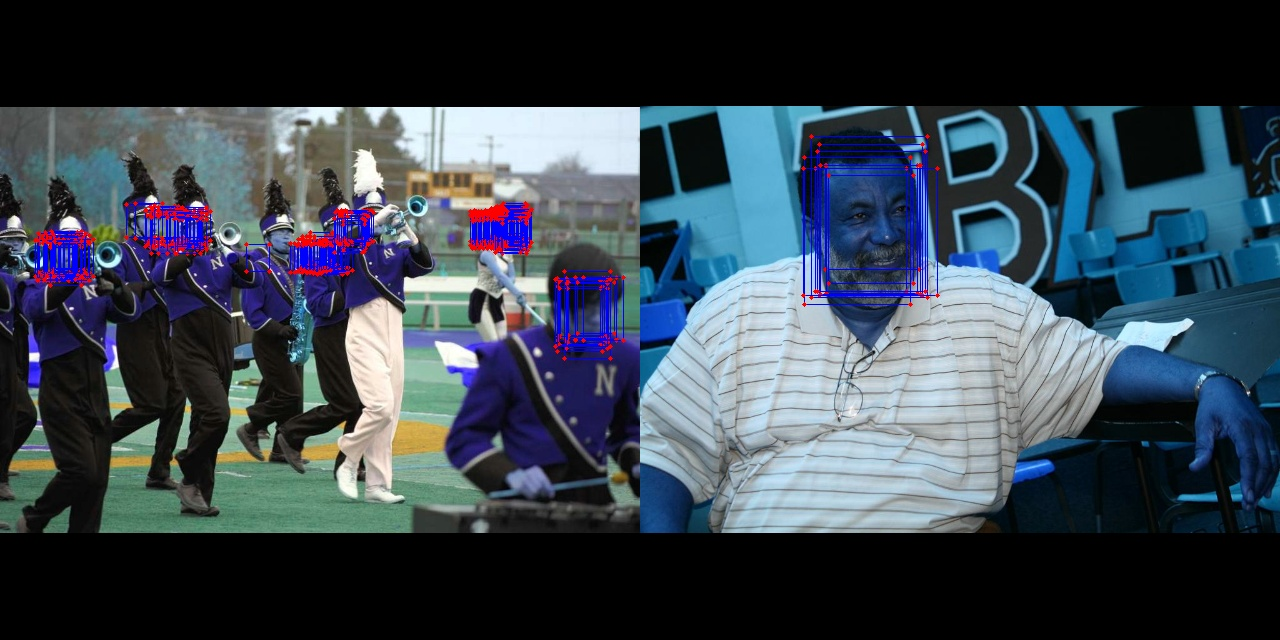

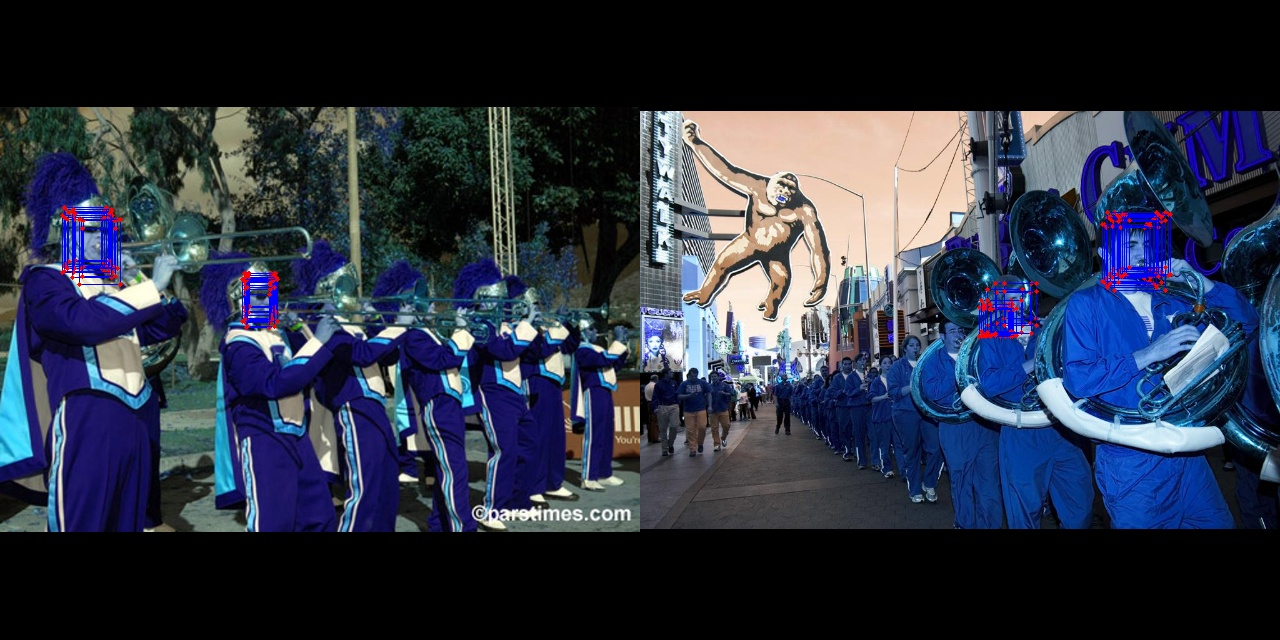

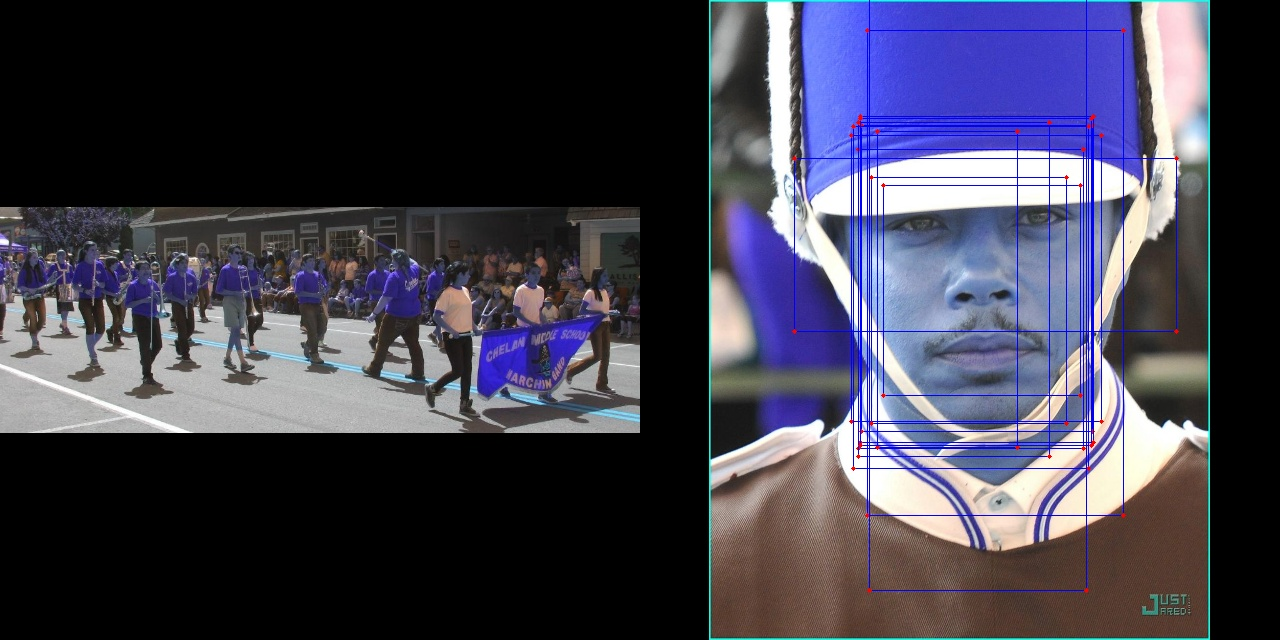

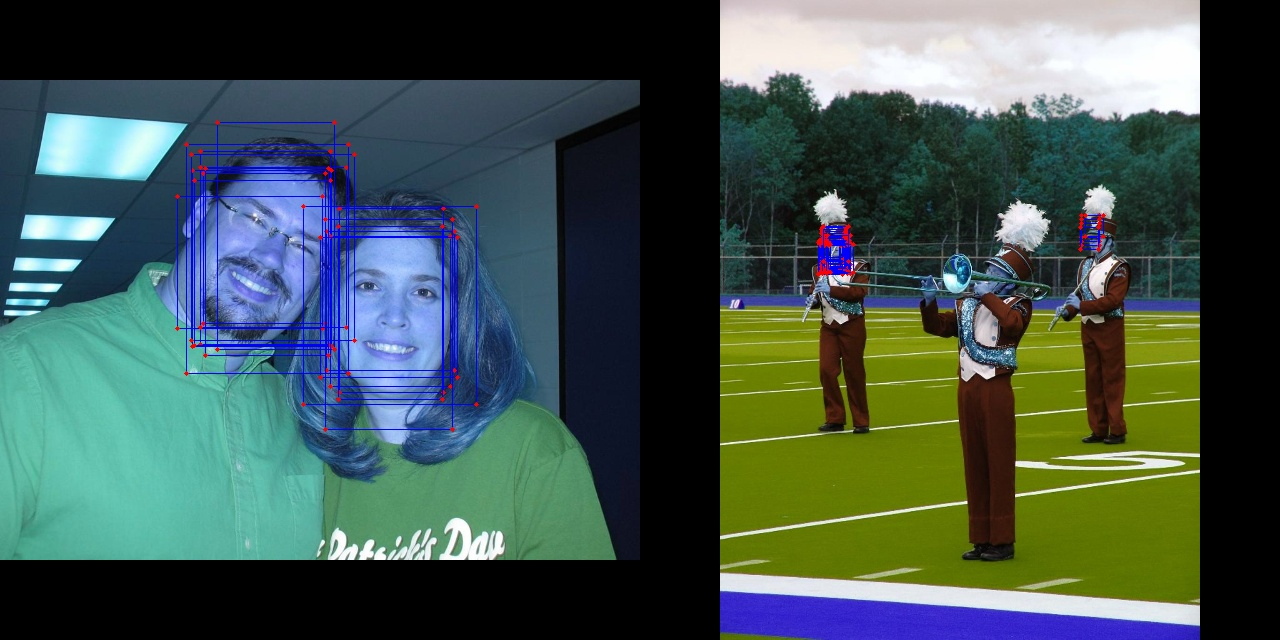

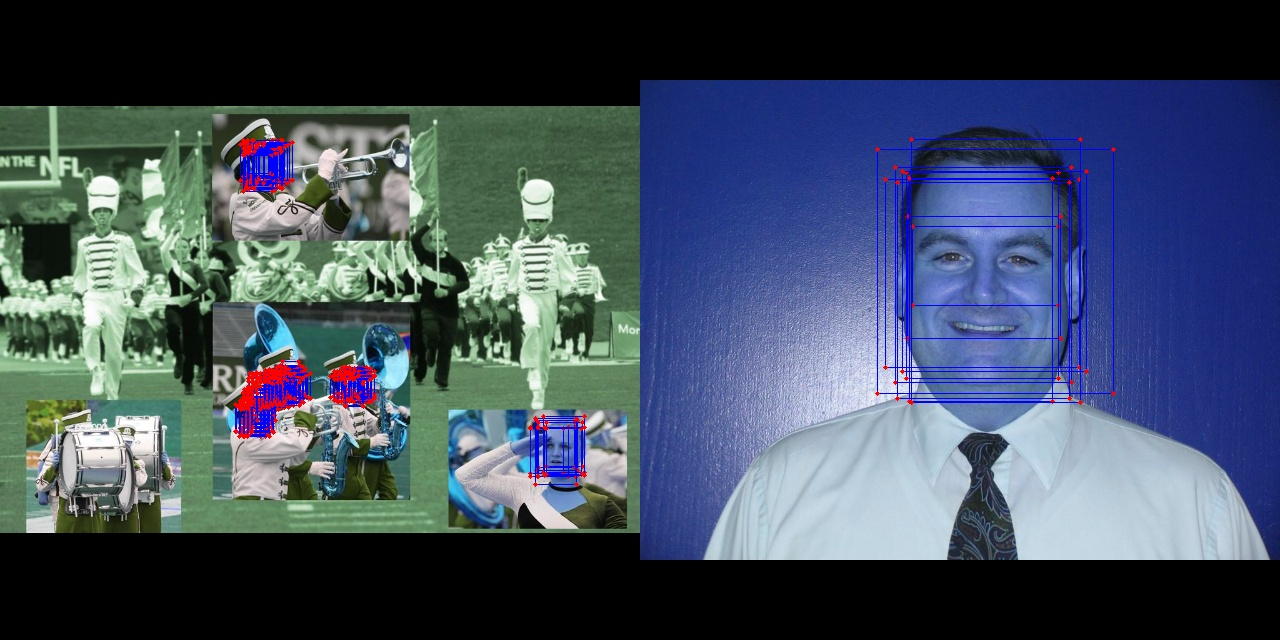

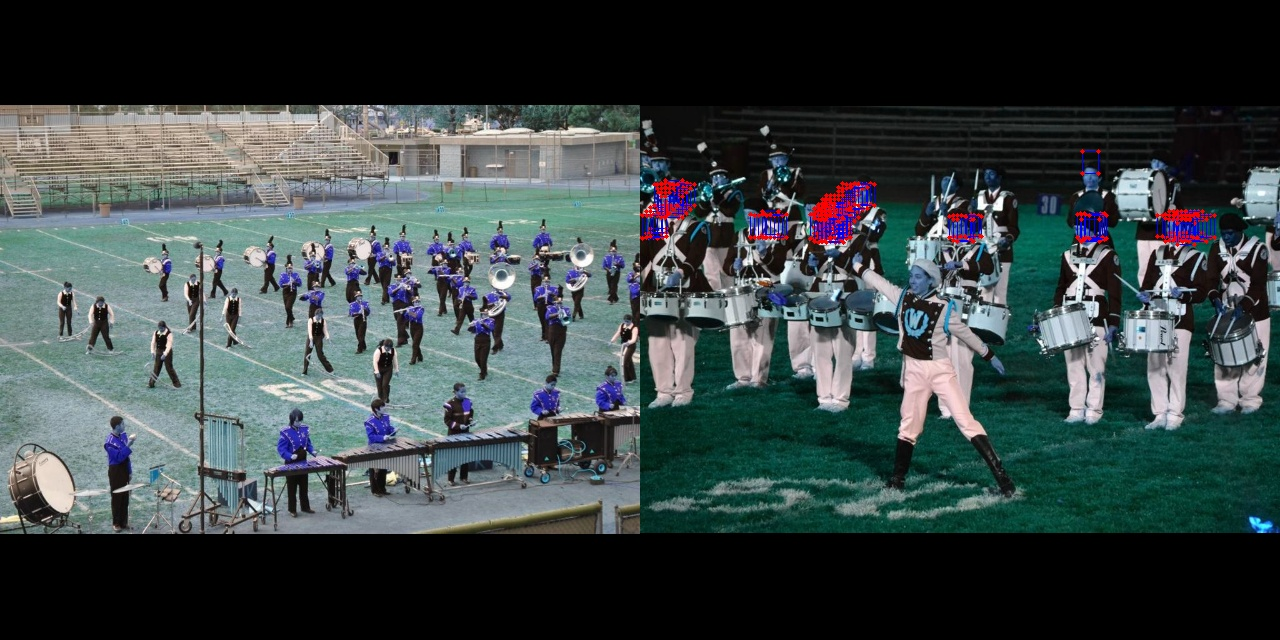

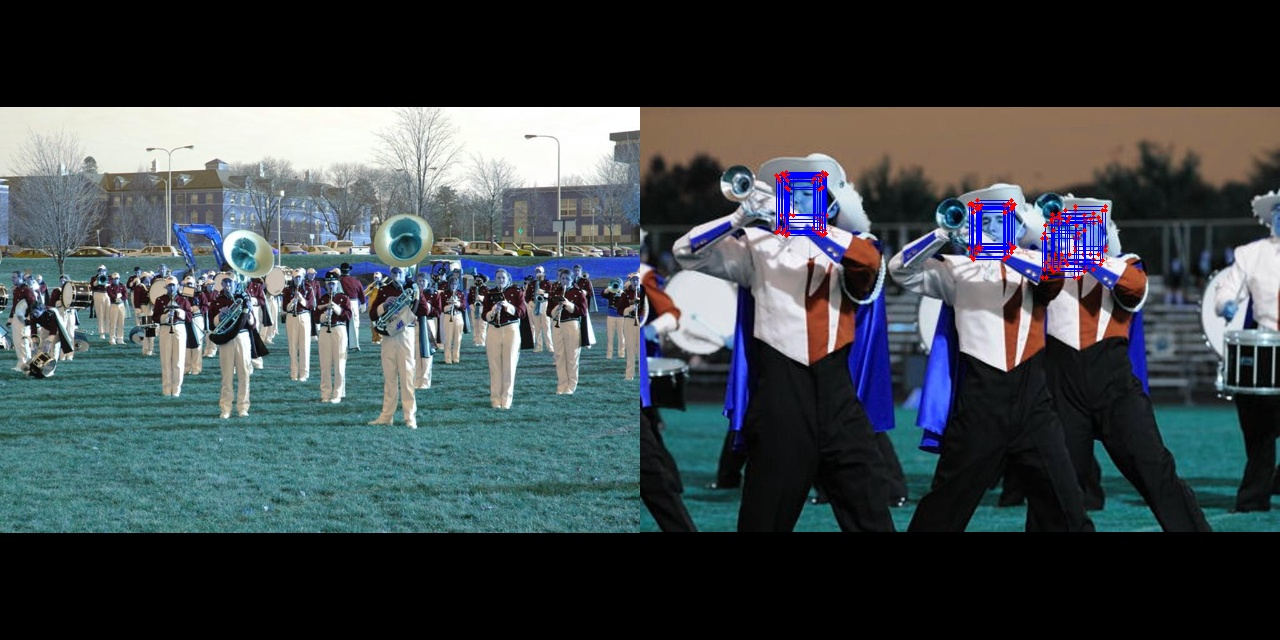

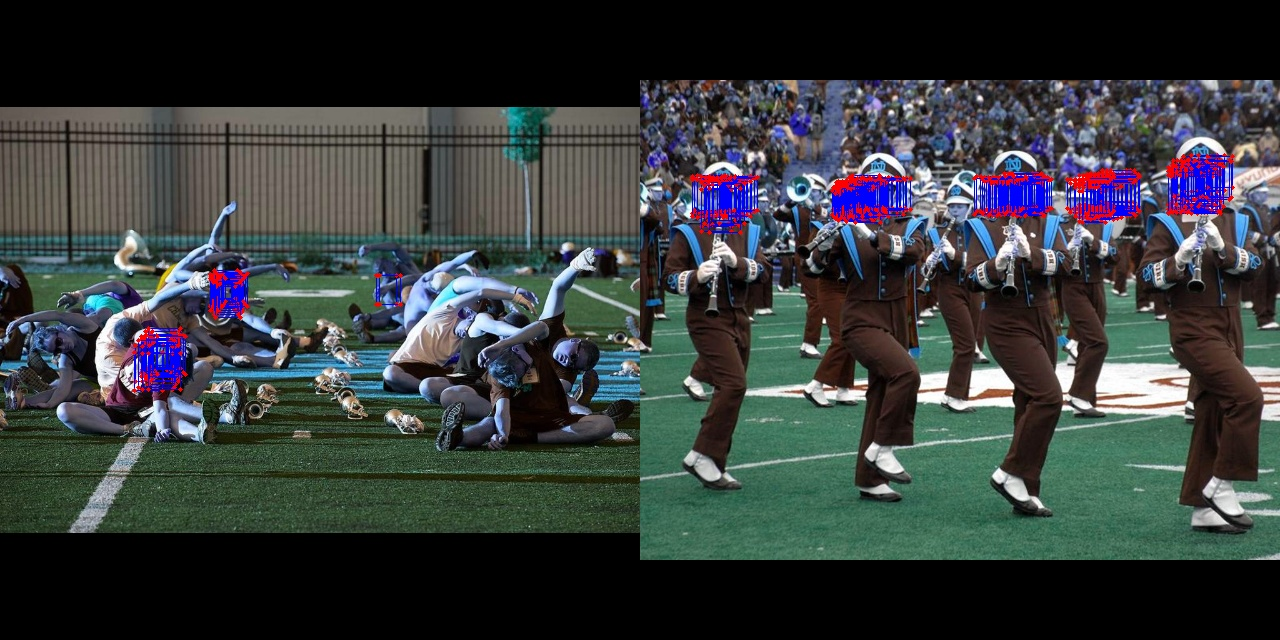

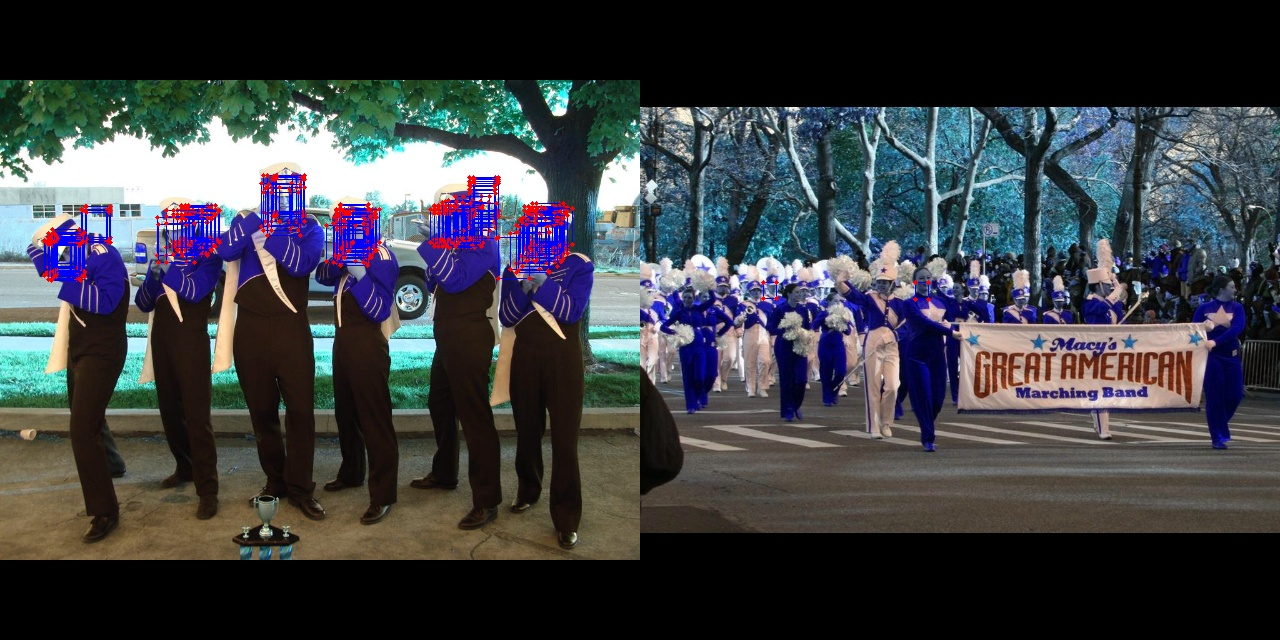

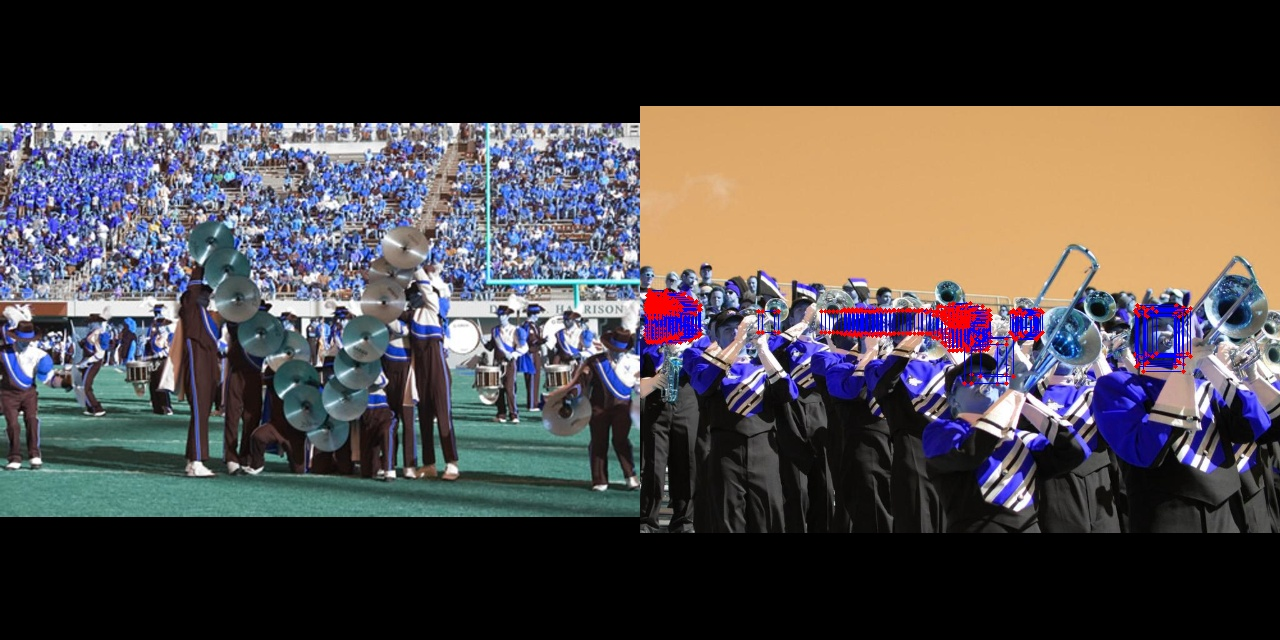

In [0]:
!rm -rf ./check_inputs && mkdir ./check_inputs

from IPython.display import Image, display
from colabsnippets.face_detection.yolov2 import create_gt_mask, create_gt_coords, extract_boxes, extract_coords_and_scores, sigmoid

tf.reset_default_graph()

from_data_idx = 0
num_inputs = 20
image_size = 640
num_images_per_row = 2
score_tresh = 0.5
draw_gt = False

#all_data = load_json('./trainData.json')
#train_data = [all_data[1], all_data[5], all_data[6], all_data[9]]
train_data = load_json('./wider_trainData.json')[from_data_idx:]
#train_data = load_json('./celeba_trainData.json')[from_data_idx:]
db = None
#db = 'WIDER'

image_augmentor = None
#image_augmentor = ImageAugmentor.load('./augmentor_4.json')
data_loader = DataLoader(train_data, start_epoch = 0, image_augmentor = image_augmentor, is_test = True)

net = FPN()
epoch = 73
model_name = net.name + 'no_aug'
#model_name = net.name + 'no_aug_celeba'
net.load_weights("{}_epoch{}".format(model_name, epoch))

X = tf.placeholder(tf.float32, [num_inputs, image_size, image_size, 3])
stages_ops = net.forward(X, num_inputs, image_size)
offsets_ops_by_stage = [ops[0] for ops in stages_ops]
scales_ops_by_stage = [ops[1] for ops in stages_ops]
scores_ops_by_stage = [tf.nn.sigmoid(ops[2]) for ops in stages_ops]

def run(sess):
  sess.run(tf.global_variables_initializer())

  db_data = []
  for data in train_data:
    if db is None or data['db'] == db:
      db_data.append(data)

  batch_x, batch_gt_boxes = data_loader.next_batch(num_inputs, image_size)
  
  feed_dict = { X: batch_x }
  masks_by_stage, __, _ = net.create_gt_masks(batch_gt_boxes, image_size)
  batch_gt_matching_anchor_boxes = net.get_anchors_from_predicted_scores(masks_by_stage, 0.1, image_size)
  batch_offsets_by_stage, batch_scales_by_stage , batch_scores_by_stage, = sess.run([offsets_ops_by_stage, scales_ops_by_stage, scores_ops_by_stage], feed_dict = feed_dict)
  batch_anchor_boxes = net.get_anchors_from_predicted_scores(batch_scores_by_stage, score_tresh, image_size)
  batch_pred_boxes = net.extract_boxes(batch_offsets_by_stage, batch_scales_by_stage, batch_scores_by_stage, score_tresh, image_size, relative_coords = True)

  file_idx = 0
  idx = 0
  while idx < num_inputs:
    imgs = np.stack(batch_x[idx : idx + num_images_per_row], axis = 0)
    gt_boxes = batch_gt_boxes[idx : idx + num_images_per_row]
    gt_matching_anchor_boxes = batch_gt_matching_anchor_boxes[idx : idx + num_images_per_row]
    anchor_boxes = batch_anchor_boxes[idx : idx + num_images_per_row]
    pred_boxes = batch_pred_boxes[idx : idx + num_images_per_row]
    
    if draw_gt:
      for i, boxes in enumerate(gt_matching_anchor_boxes):
        #print(boxes)
        for j, box in enumerate(boxes):
          draw_box(imgs[i], box, color = (0, 255, 255), thickness = 2)

      for i, boxes in enumerate(gt_boxes):
        #print(boxes)
        for j, box in enumerate(boxes):
          draw_box(imgs[i], box, color = (0, 255, 0))

      for i, boxes in enumerate(anchor_boxes):
        #print(boxes)
        for j, box in enumerate(boxes):
          draw_box(imgs[i], box, thickness = 1)
    
    for i, boxes in enumerate(pred_boxes):
      for j, box in enumerate(boxes):
        #print(box)
        draw_box(imgs[i], box, color = (255, 0, 0), thickness = 1)

    merged_img = np.concatenate(imgs, axis = 1)

    file = './check_inputs/' + str(file_idx) + '.jpg'
    cv2.imwrite(file, merged_img)
    display(Image(file))

    file_idx += 1
    idx += num_images_per_row

gpu_session(run)
    
!rm -rf ./check_inputs

# Debug

## Check Inputs

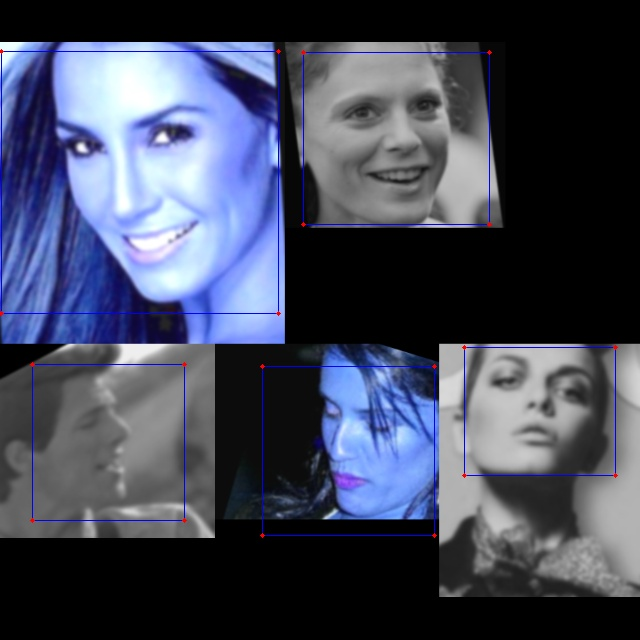

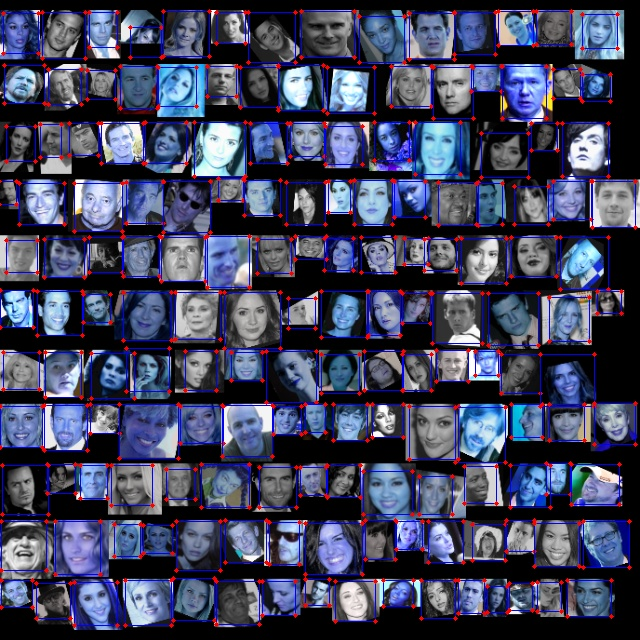

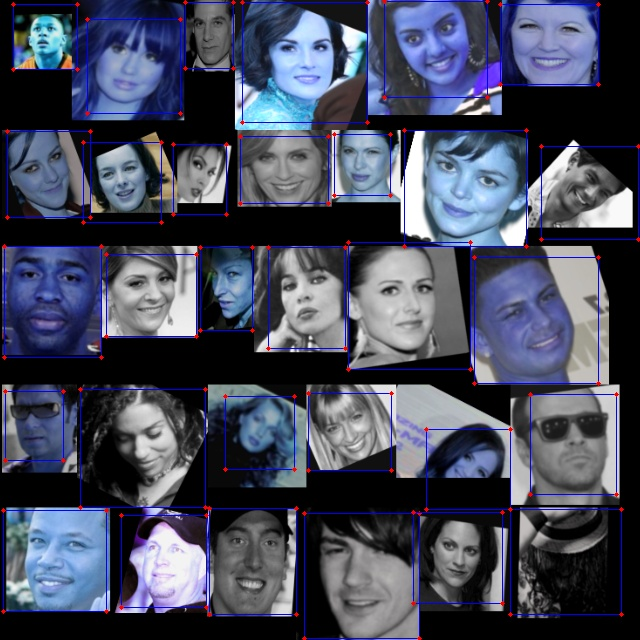

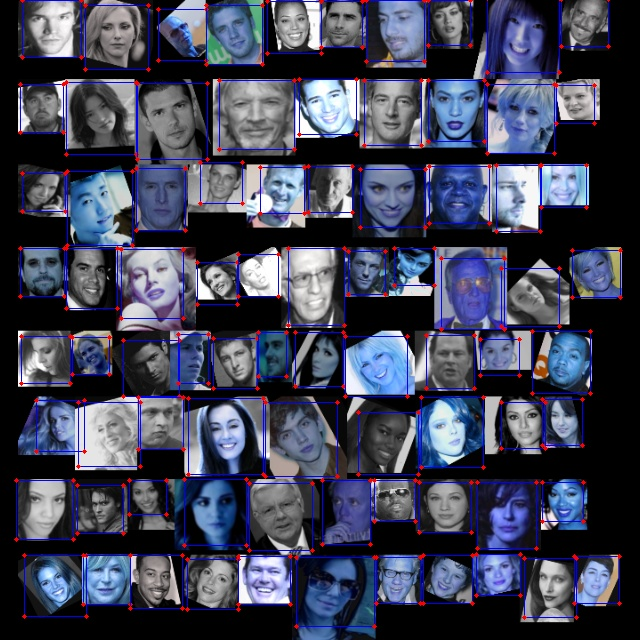

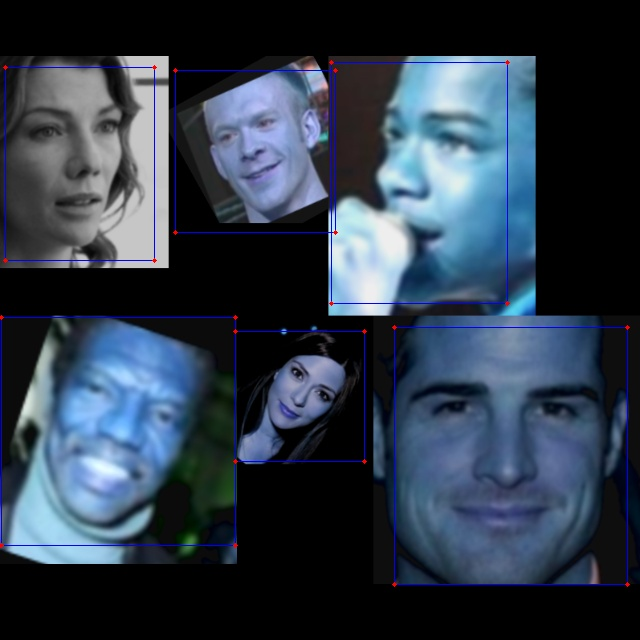

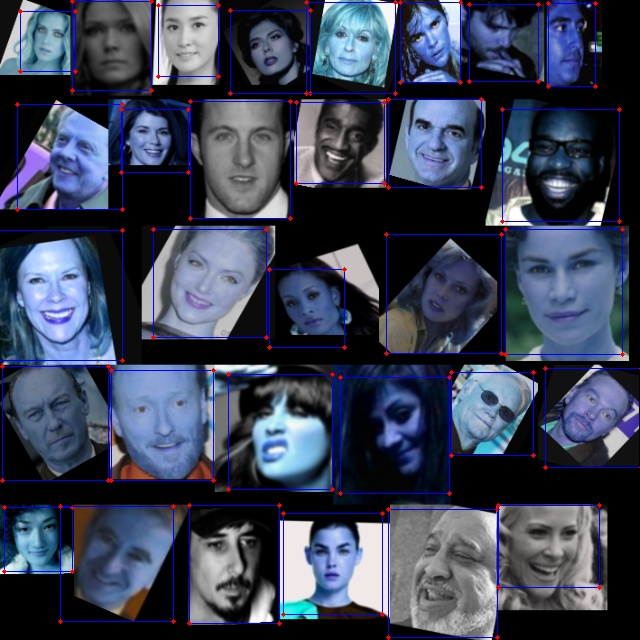

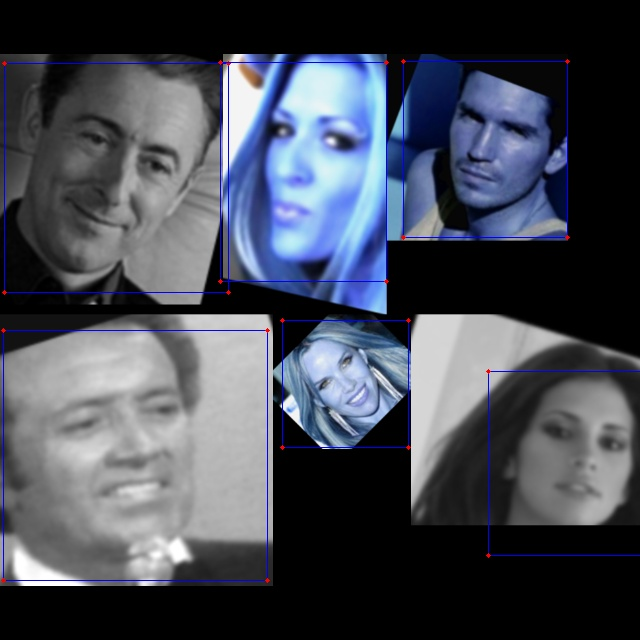

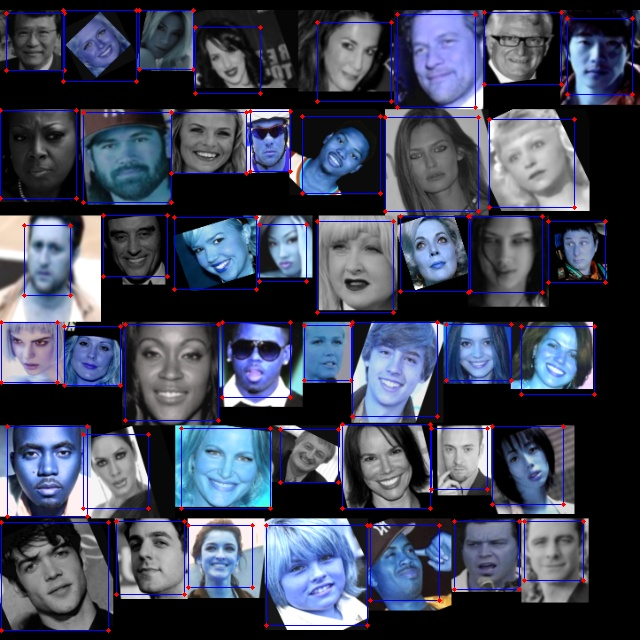

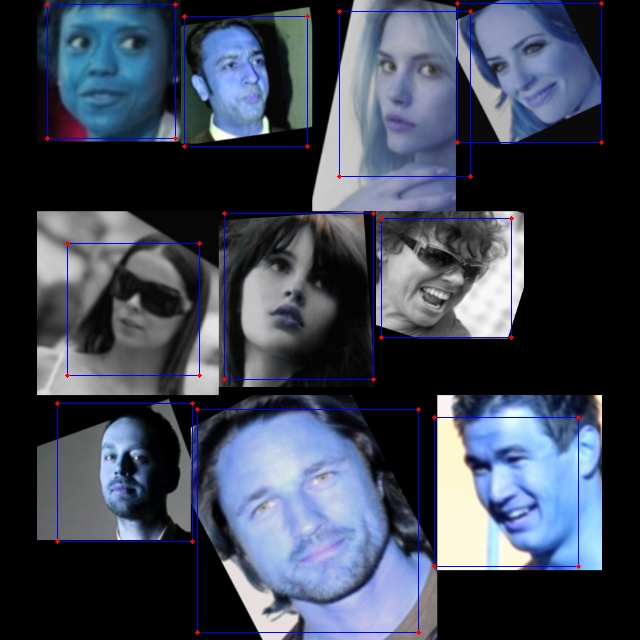

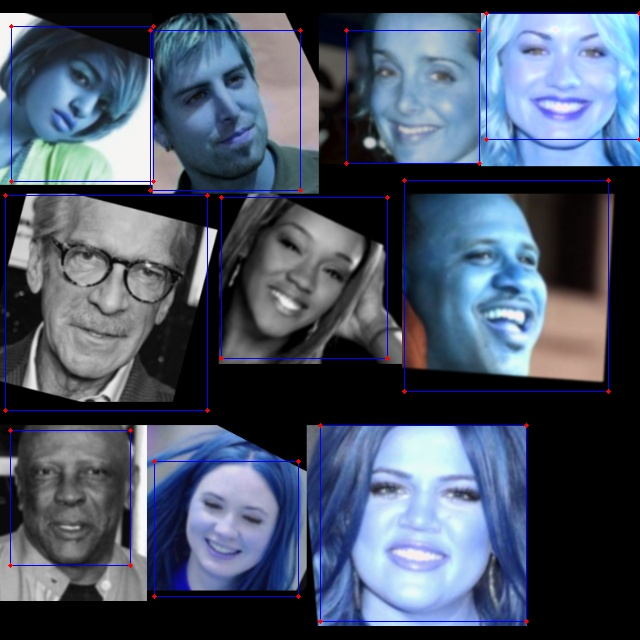

In [0]:
!rm -rf ./check_inputs && mkdir ./check_inputs

from IPython.display import Image, display

num_inputs = 10
image_size = 640
min_face_size = 32
max_face_size = image_size * 0.8 
face_size_step = 32

num_images_per_row = 1
db = None
generate_data = True
shuffle_data = False

image_augmentor = ImageAugmentor.load('./augmentor_4_strong_rot.json')
train_data = load_json('./celeba_trainData.json')

db_data = []
for data in train_data:
  if db is None or data['db'] == db:
    db_data.append(data)
    
#data_loader = DataLoader(db_data, start_epoch = 0, image_augmentor = image_augmentor, is_test = not shuffle_data)
data_loader = DataGenerator1(db_data, start_epoch = 0, image_augmentor = image_augmentor, is_test = not shuffle_data, min_face_size = min_face_size, max_face_size = max_face_size, face_size_step = face_size_step)
batch_x, batch_y = data_loader.next_batch(num_inputs, image_size)

file_idx = 0
idx = 0
while idx < num_inputs:
  imgs = np.stack(batch_x[idx : idx + num_images_per_row], axis = 0)
  all_boxes = batch_y[idx : idx + num_images_per_row]
  for i, boxes in enumerate(all_boxes):
    for box in boxes:
      draw_box(imgs[i], box)
  
  merged_img = np.concatenate(imgs, axis = 1)
  
  file = './check_inputs/' + str(file_idx) + '.jpg'
  cv2.imwrite(file, merged_img)
  display(Image(file))
  
  file_idx += 1
  idx += num_images_per_row

!rm -rf ./check_inputs